In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install mat73
import mat73

In [ ]:
import torch

if torch.cuda.is_available():
    device = torch.device('cuda')
    torch.cuda.empty_cache()
    print(torch.cuda.memory_summary(device=device, abbreviated=False))
else:
    print("CUDA is not available on this device.")

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |      0 B   |      0 B   |      0 B   |      0 B   |
|       from large pool |      0 B   |      0 B   |      0 B   |      0 B   |
|       from small pool |      0 B   |      0 B   |      0 B   |      0 B   |
|---------------------------------------------------------------------------|
| Active memory         |      0 B   |      0 B   |      0 B   |      0 B   |
|       from large pool |      0 B   |      0 B   |      0 B   |

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.figure
from pathlib import Path
import os
import wave
import keras
import seaborn as sns
import librosa
import soundfile as sf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from numpy import mean
from numpy import std
from numpy import dstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization
# from keras.layers.convolutional import Conv1D
# from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from scipy.io import wavfile
from tqdm import tqdm
import tensorflow as tf



import scipy.io
import tensorflow.keras.backend as K
# import tensorflow_addons as tfa
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.models import Model, load_model
# from tensorflow.keras.optimizers.legacy import Adam
# from tensorflow.keras import layers
# from tensorflow.keras.activations import gelu
from keras.callbacks import EarlyStopping
from tensorflow.python.keras.models import Sequential,Input,Model
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization,LeakyReLU

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch.optim.lr_scheduler import _LRScheduler
import wave,struct

In [ ]:
import torch

# **Loading and Preprocessing Data**

## **Loading Files**

In [ ]:
from glob import glob
import pandas as pd

In [ ]:
y=[]
sr=[]


paths=glob('/content/gdrive/MyDrive/sad_sorrow/data/passage_1/*.wav')

In [ ]:
paths_arr=np.array(paths)

In [ ]:
paths_arr_sort=np.sort(paths_arr)

In [ ]:
paths_arr_sort

array(['/content/gdrive/MyDrive/sad_sorrow/data/passage_1/01_P1.wav',
       '/content/gdrive/MyDrive/sad_sorrow/data/passage_1/02_P1.wav',
       '/content/gdrive/MyDrive/sad_sorrow/data/passage_1/03_P1.wav',
       '/content/gdrive/MyDrive/sad_sorrow/data/passage_1/04_P1.wav',
       '/content/gdrive/MyDrive/sad_sorrow/data/passage_1/05_P1.wav',
       '/content/gdrive/MyDrive/sad_sorrow/data/passage_1/06_P1.wav',
       '/content/gdrive/MyDrive/sad_sorrow/data/passage_1/07_P1.wav',
       '/content/gdrive/MyDrive/sad_sorrow/data/passage_1/08_P1.wav',
       '/content/gdrive/MyDrive/sad_sorrow/data/passage_1/09_P1.wav',
       '/content/gdrive/MyDrive/sad_sorrow/data/passage_1/10_P1.wav',
       '/content/gdrive/MyDrive/sad_sorrow/data/passage_1/11_P1.wav',
       '/content/gdrive/MyDrive/sad_sorrow/data/passage_1/12_P1.wav',
       '/content/gdrive/MyDrive/sad_sorrow/data/passage_1/13_P1.wav',
       '/content/gdrive/MyDrive/sad_sorrow/data/passage_1/14_P1.wav',
       '/content/gdr

In [ ]:
audio_data=[]
# sr=[]
for files in paths_arr_sort:
    audio_file,sr=librosa.load(files, sr=16000)

    audio_data.append(audio_file)


In [ ]:
print(len(audio_data))
print(sr)


64
16000


In [ ]:
audio_data_col=[]

for i in range (len(audio_data)):
    audio_data_col.append(np.transpose(audio_data[i]))

print(audio_data[5].shape)
audio_data_col[5].shape

(527006,)


(527006,)

In [ ]:
audio_data[5]

array([ 8.3988363e-07, -6.1272540e-06, -3.0573978e-05, ...,
        5.3688255e-03,  4.2012953e-03,  3.0546230e-03], dtype=float32)

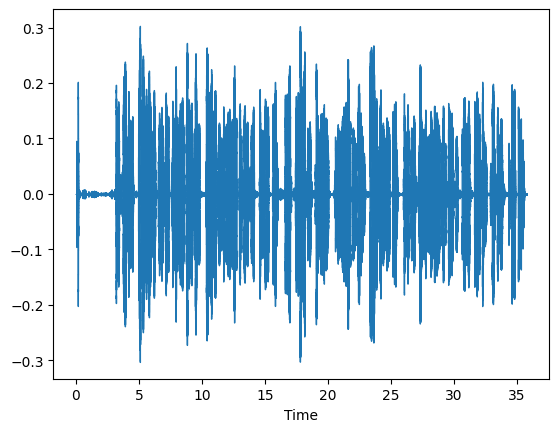

In [ ]:
librosa.display.waveshow(audio_data[1])

plt.show()

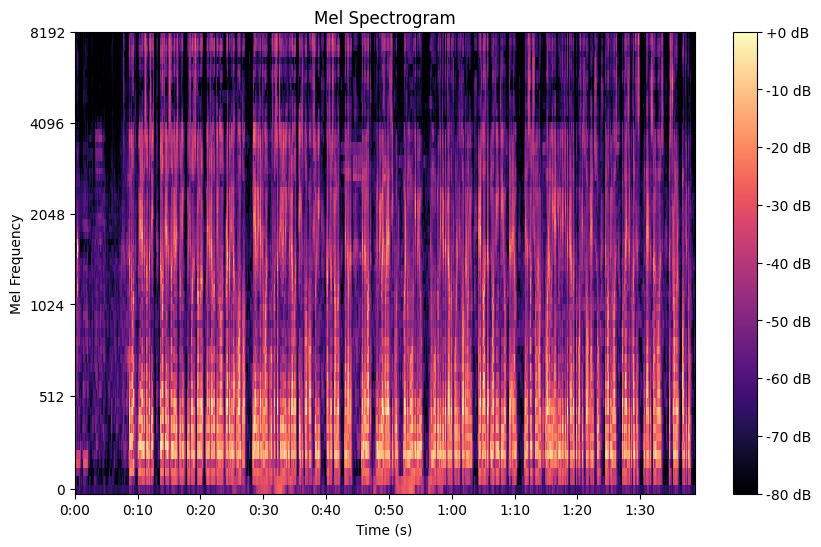

In [ ]:
mel_spec = librosa.feature.melspectrogram(y=audio_data[1], sr=16000, n_mels=64, n_fft=1024, hop_length=256, window='hann')

# Convert to decibels (dB)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# Display the Mel spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(mel_spec_db, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Mel Frequency')
plt.show()

In [ ]:
audio_data[1].shape

(789293,)

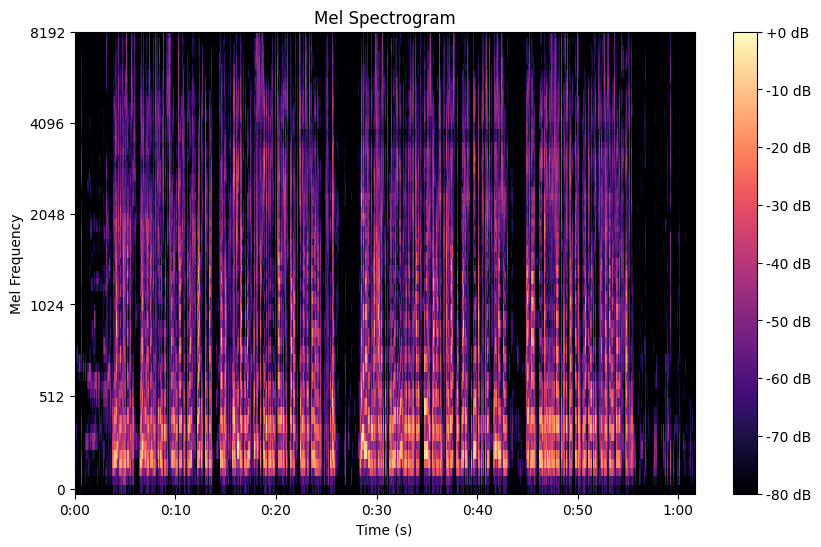

In [ ]:
mel_spec = librosa.feature.melspectrogram(y=audio_data[2], sr=16000, n_mels=64, n_fft=1024, hop_length=512, window='hann')

# Convert to decibels (dB)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# Display the Mel spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(mel_spec_db, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Mel Frequency')
plt.show()

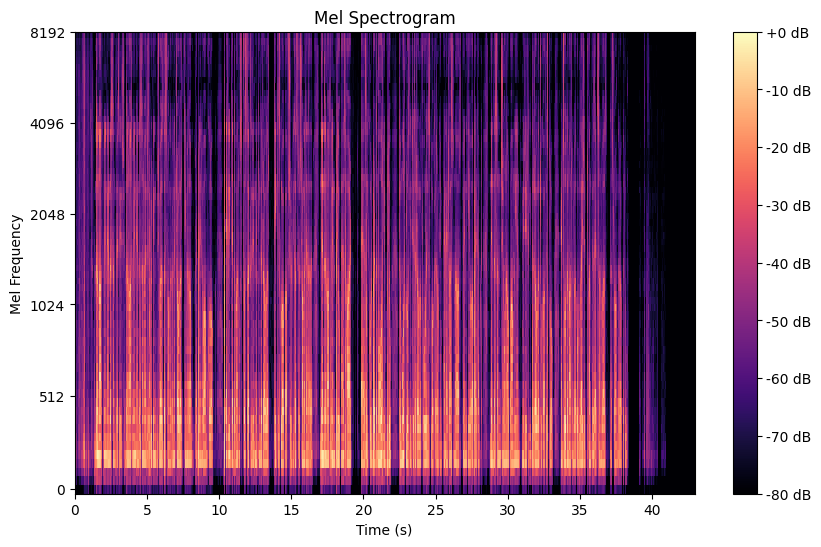

In [ ]:
mel_spec = librosa.feature.melspectrogram(y=audio_data[3], sr=16000, n_mels=64, n_fft=1024, hop_length=512, window='hann')

# Convert to decibels (dB)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# Display the Mel spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(mel_spec_db, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Mel Frequency')
plt.show()

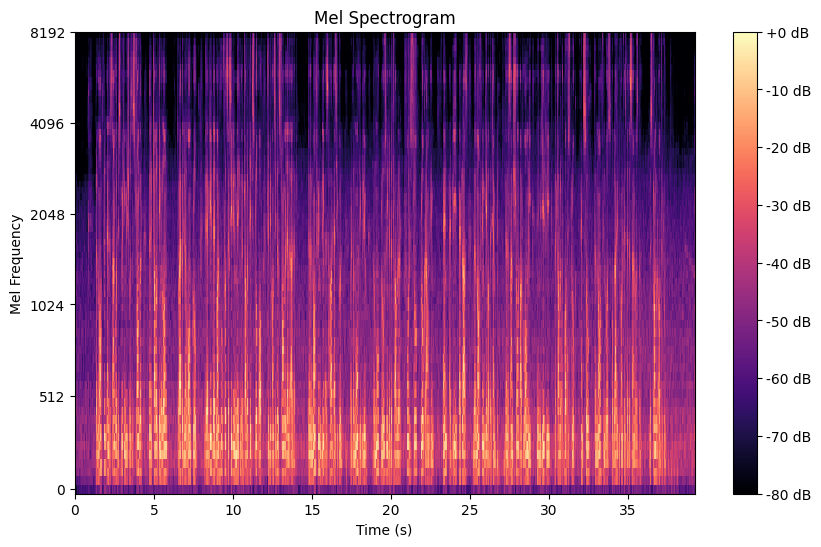

In [ ]:
mel_spec = librosa.feature.melspectrogram(y=audio_data[4], sr=16000, n_mels=64, n_fft=1024, hop_length=512, window='hann')

# Convert to decibels (dB)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# Display the Mel spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(mel_spec_db, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Mel Frequency')
plt.show()

In [ ]:
df=pd.read_excel('/content/gdrive/MyDrive/sad_sorrow/data/individual_data/SAD_Sorrow Analysis Dataset.xlsx')

In [ ]:
print(df.columns)
values = df['Depression'].values

Index(['SPEAKER ID', 'GENDER', 'PHQ-score', 'BDI-score', 'Source',
       'Depression', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')


In [ ]:
labels= df['Depression'].values

## **Preprocessing**

### **Filtering Noise (don't run)**

In [ ]:
# sr

In [ ]:
# def compute_signal_envelope(signal, window_length):
#     """
#     Compute the signal envelope by averaging signal values within a rolling window.

#     Args:
#     - signal: The input audio signal
#     - window_length: Length of the rolling window

#     Returns:
#     - envelope: The computed signal envelope
#     """
#     envelope = np.convolve(np.abs(signal), np.ones(window_length)/window_length, mode='same')
#     return envelope

In [ ]:
# audio_data_envelope=[]

# for i in range (len(audio_data)):
#     audio_data_envelope.append(compute_signal_envelope(audio_data[i],window_length=sr//20))

In [ ]:
# librosa.display.waveshow(audio_data[5])
# plt.show()

In [ ]:
# librosa.display.waveshow(audio_data_envelope[5])
# plt.show()

In [ ]:
# def adaptive_thresholding(signal, window_length, sensitivity):
#     """
#     Perform adaptive thresholding on the input signal and filter out noise below the threshold.

#     Args:
#     - signal: The input audio signal
#     - window_length: Length of the rolling window for computing local statistics
#     - sensitivity: Sensitivity parameter for adjusting the threshold

#     Returns:
#     - filtered_signal: The filtered audio signal
#     """
#     # Compute signal envelope
#     envelope = compute_signal_envelope(signal, window_length)

#     # Compute local mean and standard deviation within a rolling window
#     local_mean = np.convolve(envelope, np.ones(window_length)/window_length, mode='same')
#     local_std = np.sqrt(np.convolve((envelope - local_mean)**2, np.ones(window_length)/window_length, mode='same'))

#     # Adjust threshold based on local mean and standard deviation
#     threshold = local_mean + sensitivity * local_std

#     # Filter out noise below the threshold
#     filtered_signal = np.where(envelope > threshold, signal, 0)

#     return filtered_signal


In [ ]:
# audio_data_filtered=[]

# for i in range (len(audio_data)):
#     audio_data_filtered.append(adaptive_thresholding(audio_data[i],window_length=sr//20,sensitivity=1))

In [ ]:
# librosa.display.waveshow(audio_data_filtered[5])
# plt.show()

In [ ]:
# librosa.display.waveshow(audio_data[5])
# plt.show()

### **Segmenting the Signals**

In [ ]:
print(len(audio))


NameError: name 'audio' is not defined

variable overlap

In [ ]:




n_mels = 128
n_fft = 2048
hop_length = 512

mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

import numpy as np

def variable_overlap_segmentation(mel_spec, segment_duration, max_overlap, sr):
    num_frames = mel_spec.shape[1]
    segment_length = int(segment_duration * sr / hop_length)
    segments = []

    start = 0
    while start < num_frames:
        end = start + segment_length
        if end > num_frames:
            break
        segment = mel_spec[:, start:end]
        segments.append(segment)

        # Calculate variable overlap
        overlap_length = int(np.random.uniform(0, max_overlap) * segment_length)
        start = end - overlap_length

    return segments

segment_duration = 2  # in seconds
max_overlap = 0.5  # 50% overlap
segments = variable_overlap_segmentation(mel_spec_db, segment_duration, max_overlap, sr)

import matplotlib.pyplot as plt
import librosa.display

def plot_segments(segments, sr, hop_length):
    plt.figure(figsize=(10, 4))
    for i, segment in enumerate(segments):
        plt.subplot(len(segments), 1, i + 1)
        librosa.display.specshow(segment, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Segment {i + 1}')
    plt.tight_layout()
    plt.show()

plot_segments(segments, sr, hop_length)

ParameterError: Audio data must be of type numpy.ndarray

fixed overlap

In [ ]:
import numpy as np
from scipy.io import wavfile
def segment_voice_recording(audio_path,segment_duration, overlap):
    audio, sr = librosa.load(audio_path, sr=None)
    segment_length = int(segment_duration * sr)
    overlap_length = int(segment_length * overlap)
    segments = []
    for i in range(0, len(audio) - segment_length + 1, segment_length - overlap_length):
        segment = audio[i:i+segment_length]
        segments.append(segment)

    print(segment_length)
    print(overlap_length)
    print(len(segments))

    return segments, sr





In [ ]:
# Replace the following line with your actual audio loading code
audio_paths = []
for i in range(1, 65):

    audio_paths.append(f"./data/passage_1/0{i}_P1.wav")


In [ ]:
audio_data
my_array = np.array(audio_paths)

# Get the shape of the array
shape = my_array.shape

# Print the shape
print("Shape of the list:", shape)
print(audio_paths)

Shape of the list: (64,)
['./data/passage_1/01_P1.wav', './data/passage_1/02_P1.wav', './data/passage_1/03_P1.wav', './data/passage_1/04_P1.wav', './data/passage_1/05_P1.wav', './data/passage_1/06_P1.wav', './data/passage_1/07_P1.wav', './data/passage_1/08_P1.wav', './data/passage_1/09_P1.wav', './data/passage_1/010_P1.wav', './data/passage_1/011_P1.wav', './data/passage_1/012_P1.wav', './data/passage_1/013_P1.wav', './data/passage_1/014_P1.wav', './data/passage_1/015_P1.wav', './data/passage_1/016_P1.wav', './data/passage_1/017_P1.wav', './data/passage_1/018_P1.wav', './data/passage_1/019_P1.wav', './data/passage_1/020_P1.wav', './data/passage_1/021_P1.wav', './data/passage_1/022_P1.wav', './data/passage_1/023_P1.wav', './data/passage_1/024_P1.wav', './data/passage_1/025_P1.wav', './data/passage_1/026_P1.wav', './data/passage_1/027_P1.wav', './data/passage_1/028_P1.wav', './data/passage_1/029_P1.wav', './data/passage_1/030_P1.wav', './data/passage_1/031_P1.wav', './data/passage_1/032_

In [ ]:
print(len(audio_data))
print(len(audio_data[0]))

64
635806


In [ ]:
# Replace the following line with your actual audio filtering code
audio_data_filtered = np.zeros_like(audio_data)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (64,) + inhomogeneous part.

In [ ]:
print(audio_paths[0])
print(len(paths_arr_sort))
print(paths_arr_sort[0])

./data/passage_1/01_P1.wav
64
/content/gdrive/MyDrive/sad_sorrow/data/passage_1/01_P1.wav


In [ ]:
all_segments=[]

for i in range(len(paths_arr_sort)):
    all_segments.append(segment_voice_recording(paths_arr_sort[i],segment_duration=5, overlap=0.5))

220500
110250
14
220500
110250
18
220500
110250
23
220500
110250
16
220500
110250
14
220500
110250
12
220500
110250
14
220500
110250
16
220500
110250
16
220500
110250
21
220500
110250
19
220500
110250
16
220500
110250
16
220500
110250
14
220500
110250
17
220500
110250
16
220500
110250
24
220500
110250
16
220500
110250
17
220500
110250
18
220500
110250
22
220500
110250
11
220500
110250
15
220500
110250
17
220500
110250
18
220500
110250
15
220500
110250
22
220500
110250
16
220500
110250
12
220500
110250
12
220500
110250
14
220500
110250
15
220500
110250
15
220500
110250
15
220500
110250
15
220500
110250
12
220500
110250
18
220500
110250
15
220500
110250
15
220500
110250
16
220500
110250
12
220500
110250
13
220500
110250
18
220500
110250
14
220500
110250
17
220500
110250
15
220500
110250
18
220500
110250
13
220500
110250
13
220500
110250
23
220500
110250
15
220500
110250
16
220500
110250
15
220500
110250
14
220500
110250
15
220500
110250
14
220500
110250
13
220500
110250
17
220500
110250


In [ ]:
all_segments[63][1]

44100

In [ ]:
all_segments_list = []
all_segments = list(all_segments)
all_segments[1][1]

44100

In [ ]:
all_segments_list = []
all_segments = list(all_segments)
for i in range(len(all_segments)):
    temp = []
    temp.append(all_segments[i][0])
    temp.append(all_segments[i][1])
    all_segments_list.append(temp)

all_segments = all_segments_list
print(len(all_segments[0][0][0]))

220500


In [ ]:
# converting list of segments into arrays

segmented_sig=[]
sum=0
for i in range (len(all_segments)):
    temp_list = list(all_segments[i])
    temp_list[0] = np.array(temp_list[0])
    # Convert the list back to a tuple if needed
    all_segments[i] = tuple(temp_list)
    segmented_sig.append(all_segments[i][0])

for i in range (len(segmented_sig)):
    # print(segmented_sig[i].shape)
    sum+=segmented_sig[i].shape[0]

print(sum/len(segmented_sig))



# segmented_sig is a list having k segments of each of the 64 signals, and segmented_sig[i] is an array of shape (k,44100) corresponding to the ith audio file
# k = audio length/segment length + some contribution from overlap

# for each segment there are 44100 samples

# now we can make 85 melspecs per signal so around 5355 total images to feed ONN

15.78125


In [ ]:
len(segmented_sig)

64

In [ ]:
##### IGNORE THIS #####


# there are total segments = len(all_segments), which include all the 64 recordings

# we have sampled (ie, the segments) every second with an overlap of 0.5 seconds so each segment is 1s second long and the total number of samples is 2*42*64
# (42s = average audio file length, with some variations)
# twice because of overlap

# approximately 85 segments for each auido file



# print(len(all_segments[5][6]))
# len(all_segments)

# all_segments

In [ ]:
# import numpy as np

# envelopes=[]
# def compute_signal_envelope(signal, sampling_rate):
#     window_length = sampling_rate // 20
#     rolling_avg = np.convolve(np.abs(signal), np.ones(window_length)/window_length, mode='same')
#     return rolling_avg


# def voice_activity_detection(signal, sampling_rate, threshold):
#     # Compute the signal envelope
#     envelope = compute_signal_envelope(signal, sampling_rate)

#     # Filter out noises below the threshold
#     voice_activity = envelope > threshold

#     # Identify the voice activity segments
#     voice_segments = []
#     segment_indices = []
#     current_segment = []
#     for i, is_voice in enumerate(voice_activity):
#         if is_voice:
#             current_segment.append(signal[i])
#         elif current_segment:
#             voice_segments.append(current_segment)
#             segment_indices.append((i - len(current_segment), i))
#             current_segment = []
#     # Append the last segment if it exists
#     if current_segment:
#         voice_segments.append(current_segment)
#         segment_indices.append((len(signal) - len(current_segment), len(signal)))

#     return voice_segments, segment_indices



# sampling_rate = 44100
# threshold = 0.001

# signal = audio_data[7]


# voice_segments, segment_indices = voice_activity_detection(signal, sampling_rate, threshold)


In [ ]:
# envelope = compute_signal_envelope(signal, sampling_rate)

# print(signal.shape)
# envelope.shape


### **BWN Filter and Noise Removal (don't run)**

In [ ]:
# audio_data[6].shape


In [ ]:
# segmented_sig[8].shape

In [ ]:
# segment_dft=np.fft.fft(audio_data[8])

# segment_dft.shape

In [ ]:
# segment_dft

In [ ]:
# type(segment_dft)

In [ ]:
# segment_dft.astype(np.int64)

In [ ]:
# segment_freq=[]

# segment_freq=np.fft.fftfreq(segment_dft.shape[0], d=1/sr)

# print(len(segment_freq))
# segment_dft = np.real(segment_dft)

# for j in range (segment_dft.shape[0]):
#     for i in range(1*(len(segment_freq)//sr)+1):
#         segment_dft[j][i]=0
#         segment_dft[j][-i]=0



In [ ]:
# len(segment_freq)//sr+1

In [ ]:
# segment_dft[27][-6]

In [ ]:
# filtered_sig=np.abs(np.fft.ifft(segment_dft))

In [ ]:
# filtered_sig.shape

In [ ]:
# segmented_sig[8]

In [ ]:
# filtered_sig

In [ ]:
# librosa.display.waveshow(segmented_sig[8][6])

In [ ]:
# librosa.display.waveshow(filtered_sig[6])

### **Creating Melspectrograms**

In [ ]:
len(audio_data)

64

In [ ]:
#segmented_sig[5][8].shape
#len(segmented_sig)

In [ ]:
#len(segmented_sig)

In [ ]:
from transformers import AutoFeatureExtractor, Wav2Vec2ForSequenceClassification
#from datasets import load_dataset
import torch

In [ ]:
feature_extractor = AutoFeatureExtractor.from_pretrained("superb/wav2vec2-base-superb-ks")
model = Wav2Vec2ForSequenceClassification.from_pretrained("superb/wav2vec2-base-superb-ks")

In [ ]:
audio_data[0].shape

In [ ]:
!pip install git+https://github.com/huggingface/datasets.git
!pip install git+https://github.com/huggingface/transformers.git
!pip install jiwer
!pip install torchaudio
!pip install librosa

# Monitor the training process
!pip install wandb

In [ ]:
import numpy as np
import pandas as pd

from pathlib import Path
from tqdm import tqdm

import torchaudio
from sklearn.model_selection import train_test_split

import os
import sys

In [ ]:
data = []
i = 0
for path in tqdm(Path("./data/passage_1").glob("**/*.wav")):
    name = str(path).split('/')[-1].split('.')[0]

    label = labels[i]

    i += 1

    try:
        # There are some broken files
        s = torchaudio.load(path)
        data.append({
            "name": name,
            "path": path,
            "emotion": label
        })
    except Exception as e:
        # print(str(path), e)
        pass

    # break

In [ ]:
df = pd.DataFrame(data)
df.head()

In [ ]:
# Filter broken and non-existed paths

print(f"Step 0: {len(df)}")

df["status"] = df["path"].apply(lambda path: True if os.path.exists(path) else None)
df = df.dropna(subset=["path"])
#df = df.drop("status", 1)
print(f"Step 1: {len(df)}")

df = df.sample(frac=1)
df = df.reset_index(drop=True)
df.head()

In [ ]:
depression_count = 0

for i in range(len(df)):
    if int(df["emotion"][i]) == 1:
        depression_count += 1

print(depression_count)

In [ ]:
print("Labels: ", df["emotion"].unique())
print()
df.groupby("emotion").count()[["path"]]

In [ ]:
# import torchaudio
# import librosa
# import IPython.display as ipd
# import numpy as np

# idx = np.random.randint(0, len(df))
# sample = df.iloc[idx]
# path = sample["path"]
# label = sample["emotion"]

# print(f"ID Location: {idx}")
# print(f"      Label: {label}")
# print()

# speech, sr = torchaudio.load(path)
# speech = speech[0].numpy().squeeze()
# speech_resampled = librosa.resample(np.asarray(speech), orig_sr=sr, target_sr=16000)
# ipd.Audio(data=np.asarray(speech_resampled), autoplay=True, rate=16000)
# #

In [ ]:
save_path = "./data"

train_df, test_df = train_test_split(df, test_size=0.2, random_state=101, stratify=df["emotion"])

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

train_df.to_csv(f"{save_path}/train.csv", sep="\t", encoding="utf-8", index=False)
test_df.to_csv(f"{save_path}/test.csv", sep="\t", encoding="utf-8", index=False)


print(train_df.shape)
print(test_df.shape)

In [ ]:
!pip install --upgrade huggingface_hub
!pip install --upgrade pip
!pip install --upgrade <package_name>


In [ ]:
import huggingface_hub
!pip install ipywidgets

In [ ]:
# Loading the created dataset using datasets
from datasets import load_dataset, load_metric


data_files = {
    "train": "./data/train.csv",
    "validation": "./data/test.csv",
}

dataset = load_dataset("csv", data_files=data_files, delimiter="\t", )
train_dataset = dataset["train"]
eval_dataset = dataset["validation"]

print(train_dataset)
print(eval_dataset)

In [ ]:
# We need to specify the input and output column
input_column = "path"
output_column = "emotion"

In [ ]:
# we need to distinguish the unique labels in our SER dataset
label_list = train_dataset.unique(output_column)
label_list.sort()  # Let's sort it for determinism
num_labels = len(label_list)
print(f"A classification problem with {num_labels} classes: {label_list}")

In [ ]:
from transformers import AutoConfig, Wav2Vec2Processor

In [ ]:
model_name_or_path = "lighteternal/wav2vec2-large-xlsr-53-greek"
pooling_mode = "mean"

In [ ]:
# config
config = AutoConfig.from_pretrained(
    model_name_or_path,
    num_labels=num_labels,
    label2id={label: i for i, label in enumerate(label_list)},
    id2label={i: label for i, label in enumerate(label_list)},
    finetuning_task="wav2vec2_clf",
)
setattr(config, 'pooling_mode', pooling_mode)

In [ ]:
processor = Wav2Vec2Processor.from_pretrained(model_name_or_path,)
target_sampling_rate = processor.feature_extractor.sampling_rate
print(f"The target sampling rate: {target_sampling_rate}")

In [ ]:
def speech_file_to_array_fn(path):
    speech_array, sampling_rate = torchaudio.load(path)
    resampler = torchaudio.transforms.Resample(sampling_rate, target_sampling_rate)
    speech = resampler(speech_array).squeeze().numpy()
    return speech

def label_to_id(label, label_list):

    if len(label_list) > 0:
        return label_list.index(label) if label in label_list else -1

    return label

def preprocess_function(examples):
    speech_list = [speech_file_to_array_fn(path) for path in examples[input_column]]
    target_list = [label_to_id(label, label_list) for label in examples[output_column]]

    result = processor(speech_list, sampling_rate=target_sampling_rate)
    result["labels"] = list(target_list)

    return result

In [ ]:
train_dataset = train_dataset.map(
    preprocess_function,
    batch_size=100,
    batched=True,
    num_proc=4
)
eval_dataset = eval_dataset.map(
    preprocess_function,
    batch_size=100,
    batched=True,
    num_proc=4
)

In [ ]:
idx = 0
print(f"Training input_values: {train_dataset[idx]['input_values']}")
print(f"Training attention_mask: {train_dataset[idx]['attention_mask']}")
print(f"Training labels: {train_dataset[idx]['labels']} - {train_dataset[idx]['emotion']}")

In [ ]:
from dataclasses import dataclass
from typing import Optional, Tuple
import torch
from transformers.file_utils import ModelOutput


@dataclass
class SpeechClassifierOutput(ModelOutput):
    loss: Optional[torch.FloatTensor] = None
    logits: torch.FloatTensor = None
    hidden_states: Optional[Tuple[torch.FloatTensor]] = None
    attentions: Optional[Tuple[torch.FloatTensor]] = None


In [ ]:
import torch
import torch.nn as nn
from torch.nn import BCEWithLogitsLoss, CrossEntropyLoss, MSELoss

from transformers.models.wav2vec2.modeling_wav2vec2 import (
    Wav2Vec2PreTrainedModel,
    Wav2Vec2Model
)


class Wav2Vec2ClassificationHead(nn.Module):
    """Head for wav2vec classification task."""

    def __init__(self, config):
        super().__init__()
        self.dense = nn.Linear(config.hidden_size, config.hidden_size)
        self.dropout = nn.Dropout(config.final_dropout)
        self.out_proj = nn.Linear(config.hidden_size, config.num_labels)

    def forward(self, features, **kwargs):
        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x


class Wav2Vec2ForSpeechClassification(Wav2Vec2PreTrainedModel):
    def __init__(self, config):
        super().__init__(config)
        self.num_labels = config.num_labels
        self.pooling_mode = config.pooling_mode
        self.config = config

        self.wav2vec2 = Wav2Vec2Model(config)
        self.classifier = Wav2Vec2ClassificationHead(config)

        self.init_weights()

    def freeze_feature_extractor(self):
        self.wav2vec2.feature_extractor._freeze_parameters()

    def merged_strategy(
            self,
            hidden_states,
            mode="mean"
    ):
        if mode == "mean":
            outputs = torch.mean(hidden_states, dim=1)
        elif mode == "sum":
            outputs = torch.sum(hidden_states, dim=1)
        elif mode == "max":
            outputs = torch.max(hidden_states, dim=1)[0]
        else:
            raise Exception(
                "The pooling method hasn't been defined! Your pooling mode must be one of these ['mean', 'sum', 'max']")

        return outputs

    def forward(
            self,
            input_values,
            attention_mask=None,
            output_attentions=None,
            output_hidden_states=None,
            return_dict=None,
            labels=None,
    ):
        return_dict = return_dict if return_dict is not None else self.config.use_return_dict
        outputs = self.wav2vec2(
            input_values,
            attention_mask=attention_mask,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
        )
        hidden_states = outputs[0]
        hidden_states = self.merged_strategy(hidden_states, mode=self.pooling_mode)
        logits = self.classifier(hidden_states)

        loss = None
        if labels is not None:
            if self.config.problem_type is None:
                if self.num_labels == 1:
                    self.config.problem_type = "regression"
                elif self.num_labels > 1 and (labels.dtype == torch.long or labels.dtype == torch.int):
                    self.config.problem_type = "single_label_classification"
                else:
                    self.config.problem_type = "multi_label_classification"

            if self.config.problem_type == "regression":
                loss_fct = MSELoss()
                loss = loss_fct(logits.view(-1, self.num_labels), labels)
            elif self.config.problem_type == "single_label_classification":
                loss_fct = CrossEntropyLoss()
                loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
            elif self.config.problem_type == "multi_label_classification":
                loss_fct = BCEWithLogitsLoss()
                loss = loss_fct(logits, labels)

        if not return_dict:
            output = (logits,) + outputs[2:]
            return ((loss,) + output) if loss is not None else output

        return SpeechClassifierOutput(
            loss=loss,
            logits=logits,
            hidden_states=outputs.hidden_states,
            attentions=outputs.attentions,
        )


In [ ]:
from dataclasses import dataclass
from typing import Dict, List, Optional, Union
import torch

import transformers
from transformers import Wav2Vec2Processor


@dataclass
class DataCollatorCTCWithPadding:
    """
    Data collator that will dynamically pad the inputs received.
    Args:
        processor (:class:`~transformers.Wav2Vec2Processor`)
            The processor used for proccessing the data.
        padding (:obj:`bool`, :obj:`str` or :class:`~transformers.tokenization_utils_base.PaddingStrategy`, `optional`, defaults to :obj:`True`):
            Select a strategy to pad the returned sequences (according to the model's padding side and padding index)
            among:
            * :obj:`True` or :obj:`'longest'`: Pad to the longest sequence in the batch (or no padding if only a single
              sequence if provided).
            * :obj:`'max_length'`: Pad to a maximum length specified with the argument :obj:`max_length` or to the
              maximum acceptable input length for the model if that argument is not provided.
            * :obj:`False` or :obj:`'do_not_pad'` (default): No padding (i.e., can output a batch with sequences of
              different lengths).
        max_length (:obj:`int`, `optional`):
            Maximum length of the ``input_values`` of the returned list and optionally padding length (see above).
        max_length_labels (:obj:`int`, `optional`):
            Maximum length of the ``labels`` returned list and optionally padding length (see above).
        pad_to_multiple_of (:obj:`int`, `optional`):
            If set will pad the sequence to a multiple of the provided value.
            This is especially useful to enable the use of Tensor Cores on NVIDIA hardware with compute capability >=
            7.5 (Volta).
    """

    processor: Wav2Vec2Processor
    padding: Union[bool, str] = True
    max_length: Optional[int] = None
    max_length_labels: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None
    pad_to_multiple_of_labels: Optional[int] = None

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        input_features = [{"input_values": feature["input_values"]} for feature in features]
        label_features = [feature["labels"] for feature in features]

        d_type = torch.long if isinstance(label_features[0], int) else torch.float

        batch = self.processor.pad(
            input_features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt",
        )

        batch["labels"] = torch.tensor(label_features, dtype=d_type)

        return batch

In [ ]:
data_collator = DataCollatorCTCWithPadding(processor=processor, padding=True)

NameError: name 'processor' is not defined

In [ ]:
is_regression = False

In [ ]:
import numpy as np
from transformers import EvalPrediction


def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions, tuple) else p.predictions
    preds = np.squeeze(preds) if is_regression else np.argmax(preds, axis=1)

    if is_regression:
        return {"mse": ((preds - p.label_ids) ** 2).mean().item()}
    else:
        return {"accuracy": (preds == p.label_ids).astype(np.float32).mean().item()}

In [ ]:
model = Wav2Vec2ForSpeechClassification.from_pretrained(
    model_name_or_path,
    config=config,
)

In [ ]:
model.freeze_feature_extractor()

In [ ]:
# from google.colab import drive

# drive.mount('/gdrive')

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="/content/wav2vec2-xlsr-greek-speech-emotion-recognition",
    # output_dir="/content/gdrive/MyDrive/wav2vec2-xlsr-greek-speech-emotion-recognition"
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=2,
    evaluation_strategy="steps",
    num_train_epochs=1.0,
    fp16=True,
    save_steps=10,
    eval_steps=10,
    logging_steps=10,
    learning_rate=1e-4,
    save_total_limit=2,
)

In [ ]:
from typing import Any, Dict, Union

import torch
from packaging import version
from torch import nn

from transformers import (
    Trainer,
    is_apex_available,
)

if is_apex_available():
    from apex import amp

if version.parse(torch.__version__) >= version.parse("1.6"):
    _is_native_amp_available = True
    from torch.cuda.amp import autocast


class CTCTrainer(Trainer):
    def training_step(self, model: nn.Module, inputs: Dict[str, Union[torch.Tensor, Any]]) -> torch.Tensor:
        """
        Perform a training step on a batch of inputs.

        Subclass and override to inject custom behavior.

        Args:
            model (:obj:`nn.Module`):
                The model to train.
            inputs (:obj:`Dict[str, Union[torch.Tensor, Any]]`):
                The inputs and targets of the model.

                The dictionary will be unpacked before being fed to the model. Most models expect the targets under the
                argument :obj:`labels`. Check your model's documentation for all accepted arguments.

        Return:
            :obj:`torch.Tensor`: The tensor with training loss on this batch.
        """

        model.train()
        inputs = self._prepare_inputs(inputs)

        if self.use_amp:
            with autocast():
                loss = self.compute_loss(model, inputs)
        else:
            loss = self.compute_loss(model, inputs)

        if self.args.gradient_accumulation_steps > 1:
            loss = loss / self.args.gradient_accumulation_steps

        if self.use_amp:
            self.scaler.scale(loss).backward()
        elif self.use_apex:
            with amp.scale_loss(loss, self.optimizer) as scaled_loss:
                scaled_loss.backward()
        elif self.deepspeed:
            self.deepspeed.backward(loss)
        else:
            loss.backward()

        return loss.detach()


In [ ]:
trainer = CTCTrainer(
    model=model,
    data_collator=data_collator,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=processor.feature_extractor,
)

In [ ]:
trainer.train()

In [ ]:
import librosa
from sklearn.metrics import classification_report

In [ ]:
test_dataset = load_dataset("csv", data_files={"test": "/content/data/test.csv"}, delimiter="\t")["test"]
test_dataset

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

In [ ]:
model_name_or_path = "m3hrdadfi/wav2vec2-xlsr-greek-speech-emotion-recognition"
config = AutoConfig.from_pretrained(model_name_or_path)
processor = Wav2Vec2Processor.from_pretrained(model_name_or_path)
model = Wav2Vec2ForSpeechClassification.from_pretrained(model_name_or_path).to(device)

In [ ]:
def speech_file_to_array_fn(batch):
    speech_array, sampling_rate = torchaudio.load(batch["path"])
    speech_array = speech_array.squeeze().numpy()
    speech_array = librosa.resample(np.asarray(speech_array), sampling_rate, processor.feature_extractor.sampling_rate)

    batch["speech"] = speech_array
    return batch


def predict(batch):
    features = processor(batch["speech"], sampling_rate=processor.feature_extractor.sampling_rate, return_tensors="pt", padding=True)

    input_values = features.input_values.to(device)
    attention_mask = features.attention_mask.to(device)

    with torch.no_grad():
        logits = model(input_values, attention_mask=attention_mask).logits

    pred_ids = torch.argmax(logits, dim=-1).detach().cpu().numpy()
    batch["predicted"] = pred_ids
    return batch

In [ ]:
test_dataset = test_dataset.map(speech_file_to_array_fn)

In [ ]:
result = test_dataset.map(predict, batched=True, batch_size=8)

In [ ]:
label_names = [config.id2label[i] for i in range(config.num_labels)]
label_names

In [ ]:
y_true = [config.label2id[name] for name in result["emotion"]]
y_pred = result["predicted"]

print(y_true[:5])
print(y_pred[:5])

In [ ]:
print(classification_report(y_true, y_pred, target_names=label_names))

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchaudio
from transformers import AutoConfig, Wav2Vec2Processor

import librosa
import IPython.display as ipd
import numpy as np
import pandas as pd

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_name_or_path = "m3hrdadfi/wav2vec2-xlsr-greek-speech-emotion-recognition"
config = AutoConfig.from_pretrained(model_name_or_path)
processor = Wav2Vec2Processor.from_pretrained(model_name_or_path)
sampling_rate = processor.feature_extractor.sampling_rate
model = Wav2Vec2ForSpeechClassification.from_pretrained(model_name_or_path).to(device)

In [ ]:
def speech_file_to_array_fn(path, sampling_rate):
    speech_array, _sampling_rate = torchaudio.load(path)
    resampler = torchaudio.transforms.Resample(_sampling_rate)
    speech = resampler(speech_array).squeeze().numpy()
    return speech


def predict(path, sampling_rate):
    speech = speech_file_to_array_fn(path, sampling_rate)
    features = processor(speech, sampling_rate=sampling_rate, return_tensors="pt", padding=True)

    input_values = features.input_values.to(device)
    attention_mask = features.attention_mask.to(device)

    with torch.no_grad():
        logits = model(input_values, attention_mask=attention_mask).logits

    scores = F.softmax(logits, dim=1).detach().cpu().numpy()[0]
    outputs = [{"Emotion": config.id2label[i], "Score": f"{round(score * 100, 3):.1f}%"} for i, score in enumerate(scores)]
    return outputs


STYLES = """
<style>
div.display_data {
    margin: 0 auto;
    max-width: 500px;
}
table.xxx {
    margin: 50px !important;
    float: right !important;
    clear: both !important;
}
table.xxx td {
    min-width: 300px !important;
    text-align: center !important;
}
</style>
""".strip()

def prediction(df_row):
    path, emotion = df_row["path"], df_row["emotion"]
    df = pd.DataFrame([{"Emotion": emotion, "Sentence": "    "}])
    setup = {
        'border': 2,
        'show_dimensions': True,
        'justify': 'center',
        'classes': 'xxx',
        'escape': False,
    }
    ipd.display(ipd.HTML(STYLES + df.to_html(**setup) + "<br />"))
    speech, sr = torchaudio.load(path)
    speech = speech[0].numpy().squeeze()
    speech = librosa.resample(np.asarray(speech), sr, sampling_rate)
    ipd.display(ipd.Audio(data=np.asarray(speech), autoplay=True, rate=sampling_rate))

    outputs = predict(path, sampling_rate)
    r = pd.DataFrame(outputs)
    ipd.display(ipd.HTML(STYLES + r.to_html(**setup) + "<br />"))

In [ ]:
test = pd.read_csv("/content/data/test.csv", sep="\t")
test.head()

In [ ]:
prediction(test.iloc[0])

In [ ]:
prediction(test.iloc[1])

In [ ]:
prediction(test.iloc[2])

In [ ]:
# audio file is decoded on the fly
inputs = feature_extractor(audio_data[0], sampling_rate=16000, return_tensors="pt")

print(inputs["input_values"].shape)
with torch.no_grad():
    logits = model(**inputs).logits

predicted_class_ids = torch.argmax(logits, dim=-1).item()
predicted_label = model.config.id2label[predicted_class_ids]
predicted_label

In [ ]:
# compute loss - target_label is e.g. "down"
target_label = model.config.id2label[0]
inputs["labels"] = torch.tensor([model.config.label2id[target_label]])
loss = model(**inputs).loss
round(loss.item(), 2)

In [ ]:
audio_data[0]

In [ ]:
len(labels)

NameError: name 'labels' is not defined

In [ ]:



n_mels = 128
n_fft = 2048
hop_length = 512

mel_spec = librosa.feature.melspectrogram(y=audio_data, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

import numpy as np

def variable_overlap_segmentation(mel_spec, segment_duration, max_overlap, sr):
    num_frames = mel_spec.shape[1]
    segment_length = int(segment_duration * sr / hop_length)
    segments = []

    start = 0
    while start < num_frames:
        end = start + segment_length
        if end > num_frames:
            break
        segment = mel_spec[:, start:end]
        segments.append(segment)

        # Calculate variable overlap
        overlap_length = int(np.random.uniform(0, max_overlap) * segment_length)
        start = end - overlap_length

    return segments

segment_duration = 2  # in seconds
max_overlap = 0.5  # 50% overlap
segments = variable_overlap_segmentation(mel_spec_db, segment_duration, max_overlap, sr)

import matplotlib.pyplot as plt
import librosa.display

def plot_segments(segments, sr, hop_length):
    plt.figure(figsize=(10, 4))
    for i, segment in enumerate(segments):
        plt.subplot(len(segments), 1, i + 1)
        librosa.display.specshow(segment, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Segment {i + 1}')
    plt.tight_layout()
    plt.show()

plot_segments(segments, sr, hop_length)


ParameterError: Audio data must be of type numpy.ndarray

In [ ]:
import librosa

l=len(segmented_sig)#64

nfft=1024
win_length=1024
hop_length=256;sr=16000
audio_rgb_list_all=[]

d_shape=64


total_imgs=0 # to store total number of images from all the recordings co
labels_final=[]

import cv2 as cvlib
for j in range (l):
  r=len(segmented_sig[j])
  audio_rgb_list=[]




  for i in range(r):

    clip=segmented_sig[j][i]
    mel_spec=librosa.feature.melspectrogram( y=clip, sr=16000,n_mels=64, n_fft=1024, hop_length=256, win_length=1024, window='hann')
    log_spectrogram = librosa.amplitude_to_db(mel_spec)
    norm=(log_spectrogram-np.min(log_spectrogram))/(np.max(log_spectrogram)-np.min(log_spectrogram))
    img = norm
    img=cvlib.resize(img, dsize=(d_shape,d_shape), interpolation=cvlib.INTER_CUBIC)
    audio_rgb_list.append(img)

    labels_final.append(labels[j])


#   print(len(audio_rgb_list))
  total_imgs+= len(audio_rgb_list)
  audio_rgb_list_all.append(audio_rgb_list)

print('Total no. of images:' +str(total_imgs))
# x=np.array(audio_rgb_list_all)
# print('shape of prev spectrogram dataset'+str(np.shape(x)))
# X=np.reshape(x,(k,1,d_shape,d_shape))
# print('shape of one spectrogram dataset'+str(np.shape(X)))

Total no. of images:1010


In [ ]:
labels_final

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,


In [ ]:
audio_rgb_list_all[1]

[array([[-0.00308102,  0.16394806,  0.19231632, ...,  0.        ,
          0.        ,  0.        ],
        [-0.00678661,  0.16719836,  0.20093988, ...,  0.        ,
          0.01059082,  0.        ],
        [-0.00706177,  0.        ,  0.        , ...,  0.        ,
         -0.00503491,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]], dtype=float32),
 array([[0.        , 0.        , 0.        , ..., 0.42625108, 0.5768087 ,
         0.42686656],
        [0.        , 0.        , 0.        , ..., 0.7818494 , 0.93537486,
         0.6604116 ],
        [0.        , 0.        , 0.        , ..., 0.72945774, 0.72073823,
         0.6855444 ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.     

In [ ]:
for i in range(len(audio_rgb_list_all)):
    print(len(audio_rgb_list_all[i]))

14
18
23
16
14
12
14
16
16
21
19
16
16
14
17
16
24
16
17
18
22
11
15
17
18
15
22
16
12
12
14
15
15
15
15
12
18
15
15
16
12
13
18
14
17
15
18
13
13
23
15
16
15
14
15
14
13
17
15
14
14
12
17
16


In [ ]:
segmented_melspec=[] # to store the segmented melspecs as arrays in a list of arrays
sum=0

for i in range (len(audio_rgb_list_all)):
    audio_rgb_list_all[i]=np.array(audio_rgb_list_all[i])
    segmented_melspec.append(audio_rgb_list_all[i])

for i in range (len(segmented_melspec)):
    # print(segmented_sig[i].shape)
    sum+=segmented_melspec[i].shape[0]

print(sum/len(segmented_melspec))

15.78125


In [ ]:
# segmented_melspec_arr=np.array(segmented_melspec)
type(segmented_melspec[8])

numpy.ndarray

In [ ]:
print(len(segmented_melspec[0][0]))
print(segmented_melspec[0].shape)
print(len(segmented_melspec[0]))

64
(14, 64, 64)
14


In [ ]:
len(segmented_melspec[0][2])

64

In [ ]:
melspec_data_arr=np.zeros((total_imgs,len(segmented_melspec[0][0]),len(segmented_melspec[0][0])))
k=0

for i in range (len(segmented_melspec)):
    for j in range (len(segmented_melspec[i])):

        melspec_data_arr[k]=segmented_melspec[i][j]
        k+=1


In [ ]:
melspec_data_arr.shape

(1010, 64, 64)

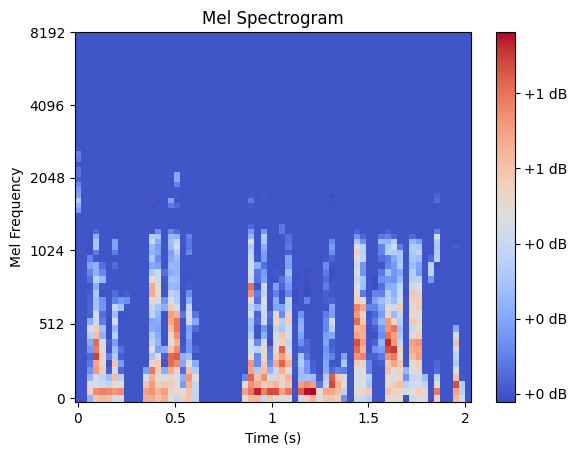

In [ ]:
librosa.display.specshow(melspec_data_arr[1000], sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Mel Frequency')
plt.show()

# **ONN**

##**Dependencies**

In [ ]:
import torch
torch.cuda.empty_cache()
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |      0 B   |      0 B   |      0 B   |      0 B   |\n|       from large pool |      0 B   |      0 B   |      0 B   |      0 B   |\n|       from small pool |      0 B   |      0 B   |      0 B   |      0 B   |\n|---------------------------------------------------------------------------|\n| Active memory         |      0 B   |      0 B   |      0 B   |      0 B   |\n|       from large pool |      0 B   |      0 B   |

In [ ]:
!git clone https://github.com/junaidmalik09/fastonn.git
%cd /content/fastonn
!pip install .
import fastonn
from fastonn import SelfONN2d

Cloning into 'fastonn'...
remote: Enumerating objects: 178, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 178 (delta 32), reused 73 (delta 12), pack-reused 75 (from 1)
Receiving objects: 100% (178/178), 557.58 KiB | 2.11 MiB/s, done.
Resolving deltas: 100% (61/61), done.
/content/fastonn
Processing /content/fastonn
  Preparing metadata (setup.py) ... done
  Created wheel for fastonn: filename=fastonn-0.1.1-py3-none-any.whl size=299623 sha256=dea1e945679b5dfc11666cb37b64c156a3be05ad9855f5b3bdc559d6ef08ebad
  Stored in directory: /tmp/pip-ephem-wheel-cache-6c1aiaty/wheels/61/8b/99/d8de1ae4507a27413aa8596d19e503645ccfdb3df60b239682
Successfully built fastonn


/content/fastonn/fastonn/utils/utils.py:347: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if val_rate is 0: return [[np.reshape(np.array([indices]),(len(indices),)),np.array([])]]


In [ ]:
dir(fastonn)

['F',
 'Function',
 'Iterable',
 'Module',
 'OpBlock',
 'OpNetwork',
 'OpTier',
 'Optional',
 'Parameter',
 'SelfONN',
 'SelfONN1d',
 'SelfONN2d',
 'SuperONN2d',
 'Tensor',
 'Trainer',
 'Tuple',
 'Union',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'cat',
 'chirp',
 'cubic',
 'expp',
 'getOPLIB',
 'lincut',
 'logg',
 'math',
 'maxx',
 'medd',
 'mul',
 'myrelu',
 'nn',
 'no_grad',
 'osl',
 'randomshift',
 'repeat',
 'sinc',
 'sinc2',
 'sincs2',
 'sine',
 'sinh',
 'summ',
 'tanh',
 'tanh2',
 'torch',
 'trainer',
 'utils']

In [ ]:
import torch
torch.cuda.empty_cache()
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |      0 B   |      0 B   |      0 B   |      0 B   |\n|       from large pool |      0 B   |      0 B   |      0 B   |      0 B   |\n|       from small pool |      0 B   |      0 B   |      0 B   |      0 B   |\n|---------------------------------------------------------------------------|\n| Active memory         |      0 B   |      0 B   |      0 B   |      0 B   |\n|       from large pool |      0 B   |      0 B   |

In [ ]:
import gc
torch.cuda.empty_cache()
gc.collect()

5758

## **Data Split**

In [ ]:
X=np.reshape(melspec_data_arr,(melspec_data_arr.shape[0],1,len(segmented_melspec[0][0]),len(segmented_melspec[0][0])))
Y=np.array(labels_final)

In [ ]:
X.shape

(1010, 1, 64, 64)

In [ ]:
Y[5]

1

In [ ]:
from sklearn.model_selection import train_test_split
def create_datasets(X, Y,test_size=0.15,seed=None):
    X_train1, X_test, y_train1, y_test = train_test_split(X, Y, test_size=0.1,random_state=seed)


    print(y_test.shape)
    # print(snr_list_test.shape)

    # X_train, X_valid, y_train, y_valid,snr_list_train, snr_list_valid = train_test_split(X_train1, y_train1,snr_list1, test_size=0.1,random_state=seed)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train1, y_train1, test_size=0.1,random_state=seed)


    X_train, X_valid, X_test = [torch.tensor(arr, dtype=torch.float32) for arr in (X_train, X_valid, X_test)]
    y_train, y_valid, y_test = [torch.tensor(arr, dtype=torch.long) for arr in (y_train, y_valid, y_test)]


    train_ds = TensorDataset(X_train, y_train)
    valid_ds = TensorDataset(X_valid, y_valid)
    test_ds= TensorDataset(X_test, y_test)



    return train_ds, valid_ds, test_ds



In [ ]:
def create_loaders(train_ds, valid_ds, test_ds,bs, jobs=0):
    train_dl = DataLoader(train_ds, bs, shuffle=True, num_workers=jobs)
    valid_dl = DataLoader(valid_ds, bs, shuffle=False, num_workers=jobs)
    test_dl = DataLoader(test_ds, bs, shuffle=False, num_workers=jobs)

    # snr_list_train_dl = DataLoader(snr_list_train_ds, bs, shuffle=True, num_workers=jobs)
    # snr_list_valid_dl = DataLoader(snr_list_valid_ds, bs, shuffle=False, num_workers=jobs)
    # snr_list_test_dl = DataLoader(snr_list_test_ds, bs, shuffle=False, num_workers=jobs)
    return train_dl, valid_dl,test_dl
    # ,snr_list_train_dl ,snr_list_valid_dl,snr_list_test_dl

In [ ]:
print('Preparing datasets')
trn_ds, val_ds, tst_ds  = create_datasets(X,Y,seed=25)
# snr_list_train_ds,snr_list_valid_ds,snr_list_test_ds

Preparing datasets
(101,)


In [ ]:
bs = 128
print(f'Creating data loaders with batch size: {bs}')
trn_dl, val_dl,tst_dl = create_loaders(trn_ds, val_ds,tst_ds, bs)

Creating data loaders with batch size: 128


In [ ]:
for i, (x_batch, y_batch) in enumerate(trn_dl):
    print(x_batch.shape)  # Ensure this matches the expected input shape
    break


torch.Size([128, 1, 64, 64])


In [ ]:
print(trn_ds.tensors[0].shape)
print(len(trn_ds))

torch.Size([818, 1, 64, 64])
818


In [ ]:
# Collect all data and labels from the dataset
x_trained = torch.stack([trn_ds[i][0] for i in range(len(trn_ds))])
y_trained = torch.tensor([trn_ds[i][1] for i in range(len(trn_ds))])


In [ ]:
from sklearn.model_selection import train_test_split

# Check the shape and size of melspec_data_arr
print("Shape of melspec_data_arr:", melspec_data_arr.shape)
print("Number of samples in melspec_data_arr:", melspec_data_arr.shape[0])

# If melspec_data_arr has only one sample, you can't split it
# You might need to gather more data or adjust the split
if melspec_data_arr.shape[0] == 1:
    print("Warning: melspec_data_arr has only one sample. Splitting is not possible.")
    # Consider options like:
    # 1. Gathering more data
    # 2. Using cross-validation techniques if data is limited
    # 3. Adjusting the test_size to 0, effectively using all data for training (but no testing)
else:
    X_train_1, X_test, Y_train_1, Y_test = train_test_split(
        melspec_data_arr, labels_final, test_size=0.1, random_state=10
    )

Shape of melspec_data_arr: (1010, 64, 64)
Number of samples in melspec_data_arr: 1010


In [ ]:
X_train_1[1].shape

(64, 64)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np

# Load VGGish model (using VGG16 as a similar base structure)
def load_vggish_model():
    base_model = tf.keras.applications.VGG16(include_top=False, weights=None, input_shape=(64, 64, 1))
    x = base_model.output
    x = Conv2D(3, (1, 1), activation='relu', padding='same')(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    output_layer = Dense(3, activation='softmax')(x)  # Assign the Dense layer to a variable
    model = Model(inputs=base_model.input, outputs=output_layer)

    # Freeze the base model layers
    for layer in base_model.layers:
        layer.trainable = False

    return model

# Data generator using in-memory spectrograms
def data_generator(melspec_data_arr, labels_final, batch_size=32):
    num_samples = len(melspec_data_arr)  # Get the total number of samples
    while True:
        indices = np.random.permutation(num_samples)
        for i in range(0, num_samples, batch_size):
            batch_indices = indices[i : i + batch_size]
            batch_x = melspec_data_arr[batch_indices]  # Directly slice the array

            # Convert labels_final to a NumPy array for indexing
            batch_y = np.array(labels_final)[batch_indices]  # Convert to NumPy array before indexing

            # Reshape if necessary, assuming melspec_data_arr already has the correct dimensions
            if batch_x.shape[-1] != 1:
                batch_x = batch_x.reshape(-1, 64, 64, 1)
            yield batch_x, batch_y

# Assume these are the in-memory spectrograms and labels
# Replace these with your actual variables
train_spectrograms = [...]  # List or array of training spectrograms
train_labels = [...]        # List or array of training labels
val_spectrograms = [...]    # List or array of validation spectrograms
val_labels = [...]          # List or array of validation labels

# Load and compile the model
model = load_vggish_model()
model.compile(optimizer=Adam(learning_rate=1e-2), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set up data generators for training and validation
batch_size = 16
train_gen = data_generator( X_train_1,Y_train_1, batch_size=batch_size)
val_gen = data_generator(X_test, Y_test, batch_size=batch_size)

steps_per_epoch = len( X_train_1) // batch_size
validation_steps = len(X_test) // batch_size

# Train the model
history = model.fit(
    train_gen,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_gen,
    validation_steps=validation_steps,
    epochs=100
)

# Evaluate the model
test_loss, test_acc = model.evaluate(val_gen, steps=validation_steps)
print("Test Accuracy:", test_acc)


Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - accuracy: 0.4755 - loss: 0.9649 - val_accuracy: 0.5312 - val_loss: 0.9719
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.5026 - loss: 0.8805 - val_accuracy: 0.5529 - val_loss: 0.9766
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5510 - loss: 0.8960 - val_accuracy: 0.4824 - val_loss: 0.9823
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5608 - loss: 0.8747 - val_accuracy: 0.5294 - val_loss: 1.0580
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5315 - loss: 0.9112 - val_accuracy: 0.5647 - val_loss: 0.9383
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5637 - loss: 0.8904 - val_accuracy: 0.5765 - val_loss: 1.0011
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5638 - loss: 0.8891 - val_accuracy: 0.5059 - val_loss: 1.0026
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5679 - loss: 0.8985 - val_accuracy: 0.

**TRIPLET** **DATA** **SPLIT** **AND** **TRAINING**

## **Network**

In [ ]:
from torchsummary import summary

normal onn network ,do not run this now

In [ ]:
class ONNNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.onnv1 = nn.Sequential(
            SelfONN2d(
                in_channels=1,
                out_channels=16,
                kernel_size=3,
                q=2
            ),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.onnv2 = nn.Sequential(
             SelfONN2d(
                in_channels=16,
                out_channels=16,
                kernel_size=3,
                q=2
            ),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.onnv3 = nn.Sequential(
            SelfONN2d(
                in_channels=16,
                out_channels=16,
                kernel_size=3,
                q=3
            ),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.onnv4=nn.Sequential(
            SelfONN2d(
                in_channels=16,
                out_channels=16,
                kernel_size=3,
                q=3
            ),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(576, 250)  # Adjust the input size
        self.relu = nn.LeakyReLU()
        self.dropout = nn.Dropout(p=0.3)
        self.linear2 = nn.Linear(250, 3)
        self.output_l = nn.Softmax(dim=1)

    def forward(self, input_data):
        x = self.onnv1(input_data)
        x = self.onnv2(x)
        # x = x+x1
        x =self.onnv3(x)
        # x = self.onnv3(x)
        x = self.flatten(x)

        embed = x
        x = self.linear1(x)
        x = self.relu(x)
        x = self.dropout(x)
        logits = self.linear2(x)
        predictions = self.output_l(logits)
        return logits, embed

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = ONNNetwork().to(device)
summary(model, (1, len(segmented_melspec[0][0]), len(segmented_melspec[0][0])))



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         SelfONN2d-1           [-1, 16, 62, 62]             304
              Tanh-2           [-1, 16, 62, 62]               0
         MaxPool2d-3           [-1, 16, 31, 31]               0
         SelfONN2d-4           [-1, 16, 29, 29]           4,624
              Tanh-5           [-1, 16, 29, 29]               0
         MaxPool2d-6           [-1, 16, 14, 14]               0
         SelfONN2d-7           [-1, 16, 12, 12]           6,928
              Tanh-8           [-1, 16, 12, 12]               0
         MaxPool2d-9             [-1, 16, 6, 6]               0
          Flatten-10                  [-1, 576]               0
           Linear-11                  [-1, 250]         144,250
        LeakyReLU-12                  [-1, 250]               0
          Dropout-13                  [-1, 250]               0
           Linear-14                   

In [ ]:
out_tr, embed = model(x_batch)
print(embed.shape)


torch.Size([128, 576])


In [ ]:
import torch.nn.functional as F

class SupConLoss(nn.Module):

    def __init__(self,temperature=0.1,alpha=0.5):
        super().__init__()
        self.xent_loss = nn.CrossEntropyLoss()
        self.alpha = alpha
        self.temp = temperature

    def nt_xent_loss(self, anchor, target, labels):
        with torch.no_grad():
            labels = labels.unsqueeze(-1)
            mask = torch.eq(labels, labels.transpose(0, 1))
            mask = mask ^ torch.diag_embed(torch.diag(mask))

        anchor_dot_target = torch.einsum('bd,cd->bc', anchor, target) / self.temp
        print(target)

        anchor_dot_target = anchor_dot_target - torch.diag_embed(torch.diag(anchor_dot_target))

        logits_max, _ = torch.max(anchor_dot_target, dim=1, keepdim=True)
        logits = anchor_dot_target - logits_max.detach()

        exp_logits = torch.exp(logits)

        logits = logits * mask
        log_prob = logits - torch.log(exp_logits.sum(dim=1, keepdim=True) + 1e-12)

        mask_sum = mask.sum(dim=1)
        mask_sum = torch.where(mask_sum == 0, torch.ones_like(mask_sum), mask_sum)

        pos_logits = (mask * log_prob).sum(dim=1) / mask_sum.detach()
        loss = -1 * pos_logits.mean()
        return loss

    def forward(self, output, predicted, targets):
        normed_output = F.normalize(output, dim=-1)
        ce_loss = (1 - self.alpha) * self.xent_loss(predicted, targets)
        cl_loss = self.alpha * self.nt_xent_loss(normed_output, normed_output, targets)
        return cl_loss + ce_loss

#lr = 0.001
lr = 0.002

n_epochs = 500
iterations_per_epoch = len(trn_dl)

trainloss_history = []
valacc_history = []
valloss_history = []
trainacc_history=[]
criterion = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=lr)


print('Start model training')
loss_func = SupConLoss(alpha=0.5)

for epoch in range(1, n_epochs + 1):
    correct, total = 0, 0
    for i, (x_batch, y_batch) in enumerate(trn_dl):
        model.train()
        x_batch = x_batch.cuda()
        y_batch = y_batch.cuda()
        opt.zero_grad()
        out_tr, embed = model(x_batch)
        loss_train = loss_func(embed, out_tr, y_batch)
        loss =  criterion(out_tr, y_batch)
        preds_tr = F.log_softmax(out_tr, dim=1).argmax(dim=1)
        total += y_batch.size(0)
        correct += (preds_tr == y_batch).sum().item()
        loss_train.backward()
        opt.step()
    trainloss_history.append(loss)
    train_acc = correct / total
    trainacc_history.append(train_acc)
    with torch.no_grad():
        model.eval()
        correct, total = 0, 0
        for x_val, y_val in (val_dl):
            x_val=x_val.cuda()
            y_val = y_val.cuda()
            out_vl, embed = model(x_val)
            valid_loss = loss_func(embed, out_vl, y_val)
            preds = F.log_softmax(out_vl, dim=1).argmax(dim=1)
            total += y_val.size(0)
            correct += (preds == y_val).sum().item()
    valloss_history.append(valid_loss)
    valid_acc = correct / total
    valacc_history.append(valid_acc)
    print(f'Epoch: {epoch:3d}. Training Loss: {loss:.4f}. Validation Loss: {valid_loss:.4f}. Training Acc.: {train_acc:2.2%}  Validation Acc.: {valid_acc:2.2%}')





Start model training
tensor([[-0.1222, -0.0156, -0.0111,  ...,  0.0217,  0.0217,  0.0217],
        [ 0.1379,  0.0635,  0.0362,  ...,  0.0143,  0.0135,  0.0135],
        [ 0.1128,  0.0273,  0.0468,  ...,  0.0155,  0.0155,  0.0155],
        ...,
        [ 0.0683,  0.0399,  0.0033,  ...,  0.0122,  0.0094,  0.0127],
        [ 0.2162,  0.1483,  0.0293,  ...,  0.0109,  0.0109,  0.0109],
        [ 0.2464,  0.0243, -0.0120,  ...,  0.0180,  0.0149,  0.0224]],
       device='cuda:0', grad_fn=<DivBackward0>)
tensor([[-0.0286, -0.0611,  0.0018,  ...,  0.0256,  0.0256,  0.0256],
        [-0.0726, -0.1287,  0.1041,  ...,  0.0274,  0.0261,  0.0261],
        [-0.0467, -0.0534, -0.0127,  ...,  0.0408,  0.0317,  0.0349],
        ...,
        [ 0.1612,  0.0401,  0.0688,  ...,  0.0288,  0.0253,  0.0253],
        [ 0.0264,  0.0655, -0.0465,  ...,  0.0238,  0.0263,  0.0238],
        [-0.0592,  0.0213, -0.0502,  ...,  0.0303,  0.0303,  0.0303]],
       device='cuda:0', grad_fn=<DivBackward0>)
tensor([[-0.066

KeyboardInterrupt: 

In [ ]:
# Training function
print('starting the training process')






def train(model, trn_dl, criterion, optimizer, device, epochs):
    model.to(device)
    for epoch in range(epochs):

        running_loss = 0.0
        correct = 0
        total = 0
        for x_batch, y_batch in enumerate(trn_dl):
            model.train()
            x_batch = x_batch.cuda()
            y_batch = y_batch.cuda()
            opt.zero_grad()

            # Generate mask
            mask = generate_mask(x_batch.shape).to(device)

            optimizer.zero_grad()
            outputs = model(x_batch, mask)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total =total+ y_batch.size(0)
            correct += predicted.eq(y_batch).sum().item()
       with torch.no_grad():
           model.eval()
           correct, total = 0, 0
            for x_val, y_val in (val_dl):
               x_val=x_val.cuda()
                y_val = y_val.cuda()
                out_vl, embed = model(x_val)
                valid_loss = loss_func(embed, out_vl, y_val)
               preds = F.log_softmax(out_vl, dim=1).argmax(dim=1)
               total += y_val.size(0)
               correct += (preds == y_val).sum().item()
        epoch_loss = running_loss / len(trn_dl)
        valloss_history.append(valid_loss)
        valid_acc = correct / total
        valacc_history.append(valid_acc)

        epoch_acc = 100. * correct / total
        print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Acc: {epoch_acc:.2f}%")

# Usage

trainloss_history = []
valacc_history = []
valloss_history = []
trainacc_history=[]
num_classes = 3  # Adjust based on your classification task
in_channels = 1  # For mel spectrograms, typically 1 channel
model = MaskedONNClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Assume we have a dataloader for mel spectrograms
# train(model, dataloader, criterion, optimizer, device, epochs=10)
train(model, trn_dl, criterion, optimizer, device, epochs=500)

5 fold classification

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, SubsetRandomSampler, Dataset
from sklearn.model_selection import KFold
import numpy as np

# Example dataset for multi-class classification (3 classes in this case)
class ExampleDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# Example model for multi-class classification (replace with your own model)
class SimpleModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(input_size, num_classes)  # Example: input size 10, output 3 classes

    def forward(self, x):
        return self.fc(x)

def train_model(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    return running_loss / len(train_loader.dataset)

def evaluate_model(model, val_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return running_loss / len(val_loader.dataset), accuracy

# Initialize dataset, assuming 100 samples, 10 features, 3 classes
data = np.random.rand(100, 10)  # 100 samples, 10 features
labels = np.random.randint(0, 3, size=100)  # 3 classes

dataset = ExampleDataset(data, labels)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_results = []

for fold, (train_idx, val_idx) in enumerate(kf.split(dataset)):
    print(f'Fold {fold+1}/{kf.n_splits}')

    # Create data loaders for this fold
    train_sampler = SubsetRandomSampler(train_idx)
    val_sampler = SubsetRandomSampler(val_idx)

    train_loader = DataLoader(dataset, batch_size=16, sampler=train_sampler)
    val_loader = DataLoader(dataset, batch_size=16, sampler=val_sampler)

    # Initialize the model, loss function, and optimizer
    model = SimpleModel(input_size=10, num_classes=3).to(device)
    criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train and evaluate the model
    train_loss = train_model(model, train_loader, criterion, optimizer, device)
    val_loss, val_accuracy = evaluate_model(model, val_loader, criterion, device)

    print(f'Fold {fold+1}: Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

    fold_results.append({'train_loss': train_loss, 'val_loss': val_loss, 'val_accuracy': val_accuracy})

# Calculate average metrics across folds
avg_train_loss = np.mean([x['train_loss'] for x in fold_results])
avg_val_loss = np.mean([x['val_loss'] for x in fold_results])
avg_val_accuracy = np.mean([x['val_accuracy'] for x in fold_results])

print(f'Average Train Loss: {avg_train_loss:.4f}, Average Validation Loss: {avg_val_loss:.4f}, Average Validation Accuracy: {avg_val_accuracy:.4f}')


In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
import torch.nn.functional as F

class SupConLoss(nn.Module):

    def __init__(self,temperature=0.1,alpha=0.5):
        super().__init__()
        self.xent_loss = nn.CrossEntropyLoss()
        self.alpha = alpha
        self.temp = temperature

    def nt_xent_loss(self, anchor, target, labels):
        with torch.no_grad():
            labels = labels.unsqueeze(-1)
            mask = torch.eq(labels, labels.transpose(0, 1))
            mask = mask ^ torch.diag_embed(torch.diag(mask))

        anchor_dot_target = torch.einsum('bd,cd->bc', anchor, target) / self.temp

        anchor_dot_target = anchor_dot_target - torch.diag_embed(torch.diag(anchor_dot_target))

        logits_max, _ = torch.max(anchor_dot_target, dim=1, keepdim=True)
        logits = anchor_dot_target - logits_max.detach()

        exp_logits = torch.exp(logits)

        logits = logits * mask
        log_prob = logits - torch.log(exp_logits.sum(dim=1, keepdim=True) + 1e-12)

        mask_sum = mask.sum(dim=1)
        mask_sum = torch.where(mask_sum == 0, torch.ones_like(mask_sum), mask_sum)

        pos_logits = (mask * log_prob).sum(dim=1) / mask_sum.detach()
        loss = -1 * pos_logits.mean()
        return loss

    def forward(self, output, predicted, targets):
        normed_output = F.normalize(output, dim=-1)
        ce_loss = (1 - self.alpha) * self.xent_loss(predicted, targets)
        cl_loss = self.alpha * self.nt_xent_loss(normed_output, normed_output, targets)
        return cl_loss + ce_loss

#lr = 0.001
lr = 0.002

n_epochs = 500
iterations_per_epoch = len(trn_dl)

trainloss_history = []
valacc_history = []
valloss_history = []
trainacc_history=[]
criterion = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=lr)

kf=KFold(n_splits=5,shuffle=True,random_state=42)

print('Start model training')
loss_func = SupConLoss(alpha=0.5)


for fold,(train_idx,val,idx) in enumeeate(kf.split(trn_ds)):
    1

    for epoch in range(1, n_epochs + 1):
        correct, total = 0, 0
        for i, (x_batch, y_batch) in enumerate(trn_dl):
            model.train()
            x_batch = x_batch.cuda()
            y_batch = y_batch.cuda()
            opt.zero_grad()
            out_tr, embed = model(x_batch)
            loss_train = loss_func(embed, out_tr, y_batch)
            loss =  criterion(out_tr, y_batch)
            preds_tr = F.log_softmax(out_tr, dim=1).argmax(dim=1)
            total += y_batch.size(0)
            correct += (preds_tr == y_batch).sum().item()
            loss_train.backward()
            opt.step()
        trainloss_history.append(loss)
        train_acc = correct / total
        trainacc_history.append(train_acc)
        with torch.no_grad():
            model.eval()
            correct, total = 0, 0
            for x_val, y_val in (val_dl):
                x_val=x_val.cuda()
                y_val = y_val.cuda()
                out_vl, embed = model(x_val)
                valid_loss = loss_func(embed, out_vl, y_val)
                preds = F.log_softmax(out_vl, dim=1).argmax(dim=1)
                total += y_val.size(0)
                correct += (preds == y_val).sum().item()
        valloss_history.append(valid_loss)
        valid_acc = correct / total
        valacc_history.append(valid_acc)
        print(f'Epoch: {epoch:3d}. Training Loss: {loss:.4f}. Validation Loss: {valid_loss:.4f}. Training Acc.: {train_acc:2.2%}  Validation Acc.: {valid_acc:2.2%}')
    print(f'Fold {fold + 1} completed. Validation Accuracy: {valid_acc:2.2%}')

avg_train_loss = np.mean(trainloss_history)
avg_val_loss = np.mean(valloss_history)
avg_train_acc = np.mean(trainacc_history)
avg_val_acc = np.mean(valacc_history)

print(f'Average Training Loss: {avg_train_loss:.4f}')
print(f'Average Validation Loss: {avg_val_loss:.4f}')
print(f'Average Training Accuracy: {avg_train_acc:.2%}')
print(f'Average Validation Accuracy: {avg_val_acc:.2%}')


In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# from torch.utils.data import DataLoader, Dataset
# import numpy as np

# class SelfONN2d(nn.Module):
#     def __init__(self, in_channels, out_channels, kernel_size, q):
#         super(SelfONN2d, self).__init__()
#         self.conv = nn.Conv2d(in_channels, out_channels, kernel_size)
#         self.q = q

#     def forward(self, x):
#         return self.conv(x) ** self.q

# class ONNNetwork(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.onnv1 = nn.Sequential(
#             SelfONN2d(
#                 in_channels=3,
#                 out_channels=16,
#                 kernel_size=3,
#                 q=2
#             ),
#             nn.Tanh(),
#             nn.MaxPool2d(kernel_size=2)
#         )
#         self.onnv2 = nn.Sequential(
#              SelfONN2d(
#                 in_channels=16,
#                 out_channels=16,
#                 kernel_size=3,
#                 q=2
#             ),
#             nn.Tanh(),
#             nn.MaxPool2d(kernel_size=2)
#         )
#         self.onnv3 = nn.Sequential(
#             SelfONN2d(
#                 in_channels=16,
#                 out_channels=16,
#                 kernel_size=3,
#                 q=3
#             ),
#             nn.Tanh(),
#             nn.MaxPool2d(kernel_size=2)
#         )

#         self.flatten = nn.Flatten()
#         self.linear1 = nn.Linear(576, 250)  # Adjust the input size
#         self.relu = nn.LeakyReLU()
#         self.dropout = nn.Dropout(p=0.3)
#         self.linear2 = nn.Linear(250, 3)  # Change the output size to 3 for 3 classes
#         self.output_l = nn.Softmax(dim=1)  # Softmax over the 3 classes

#     def forward(self, input_data):
#         x = self.onnv1(input_data)
#         x = self.onnv2(x)
#         x = self.onnv3(x)
#         x = self.flatten(x)























#         embed = x
#         x = self.linear1(x)
#         x = self.relu(x)
#         x = self.dropout(x)
#         logits = self.linear2(x)
#         predictions = self.output_l(logits)
#         return logits, embed

# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# model = ONNNetwork().to(device)

# class SupConLoss(nn.Module):

#     def __init__(self, temperature=0.1, alpha=0.5):
#         super().__init__()
#         self.xent_loss = nn.CrossEntropyLoss()
#         self.alpha = alpha
#         self.temp = temperature

#     def nt_xent_loss(self, anchor, target, labels):f
#         with torch.no_grad():
#             labels = labels.unsqueeze(-1)
#             mask = torch.eq(labels, labels.transpose(0, 1, 2))
#             mask = mask ^ torch.diag_embed(torch.diag(mask))

#         anchor_dot_target = torch.einsum('bd,cd->bc', anchor, target) / self.temp
#         anchor_dot_target = anchor_dot_target - torch.diag_embed(torch.diag(anchor_dot_target))

#         logits_max, _ = torch.max(anchor_dot_target, dim=1, keepdim=True)
#         logits = anchor_dot_target - logits_max.detach()

#         exp_logits = torch.exp(logits)
#         logits = logits * mask
#         log_prob = logits - torch.log(exp_logits.sum(dim=1, keepdim=True) + 1e-12)

#         mask_sum = mask.sum(dim=1)
#         mask_sum = torch.where(mask_sum == 0, torch.ones_like(mask_sum), mask_sum)

#         pos_logits = (mask * log_prob).sum(dim=1) / mask_sum.detach()
#         loss = -1 * pos_logits.mean()
#         return loss

#     def forward(self, output, predicted, targets):
#         normed_output = F.normalize(output, dim=-1)
#         ce_loss = (1 - self.alpha) * self.xent_loss(predicted, targets)
#         cl_loss = self.alpha * self.nt_xent_loss(normed_output, normed_output, targets)
#         return cl_loss + ce_loss

# # lr = 0.001
# lr = 0.002

# n_epochs = 500
# iterations_per_epoch = len(trn_dl)

# trainloss_history = []
# valacc_history = []
# valloss_history = []
# trainacc_history = []
# criterion = nn.CrossEntropyLoss()
# opt = torch.optim.Adam(model.parameters(), lr=lr)

# print('Start model training')
# loss_func = SupConLoss(alpha=0.5)

# for epoch in range(1, n_epochs + 1):
#     correct, total = 0, 0
#     for i, (x_batch, y_batch) in enumerate(trn_dl):
#         model.train()
#         x_batch = x_batch.cuda()
#         y_batch = y_batch.cuda()
#         opt.zero_grad()
#         out_tr, embed = model(x_batch)
#         loss_train = loss_func(embed, out_tr, y_batch)
#         loss = criterion(out_tr, y_batch)
#         preds_tr = F.log_softmax(out_tr, dim=1).argmax(dim=1)
#         total += y_batch.size(0)
#         correct += (preds_tr == y_batch).sum().item()
#         loss_train.backward()
#         opt.step()
#     trainloss_history.append(loss)
#     train_acc = correct / total
#     trainacc_history.append(train_acc)
#     with torch.no_grad():
#         model.eval()
#         correct, total = 0, 0
#         for x_val, y_val in val_dl:
#             x_val = x_val.cuda()
#             y_val = y_val.cuda()
#             out_vl, embed = model(x_val)
#             valid_loss = loss_func(embed, out_vl, y_val)
#             preds = F.log_softmax(out_vl, dim=1).argmax(dim=1)
#             total += y_val.size(0)
#             correct += (preds == y_val).sum().item()
#     valloss_history.append(valid_loss)
#     valid_acc = correct / total
#     valacc_history.append(valid_acc)
#     print(f'Epoch: {epoch:3d}. Training Loss: {loss:.4f}. Validation Loss: {valid_loss:.4f}. Training Acc.: {train_acc:2.2%}  Validation Acc.: {valid_acc:2.2%}')


# **Normal CNN**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.figure
from pathlib import Path
import os
import wave
import keras
import seaborn as sns
import librosa
import soundfile as sf
from google.colab import drive
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from numpy import mean
from numpy import std
from numpy import dstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization
# from keras.layers.convolutional import Conv1D
# from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from scipy.io import wavfile
from tqdm import tqdm
import tensorflow as tf



from tensorflow.keras.activations import gelu
from keras.callbacks import EarlyStopping
from tensorflow.python.keras.models import Sequential,Input,Model
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization,LeakyReLU



from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.activations import sigmoid
from keras.optimizers import Adam

In [ ]:
X=melspec_data_arr

Y=np.array(labels_final)

Y_train=pd.get_dummies(Y)
# Y_train=np.array(Y_train)
Y_train

In [ ]:
Y_train.shape

In [ ]:
train_X_cnn, valid_X_cnn, train_label_cnn, valid_label_cnn=train_test_split(X, Y_train, test_size=0.1,random_state=69)

In [ ]:
type(X)

In [ ]:
num_classes=3

model=Sequential()



model.add(Conv2D(32, kernel_size=(3, 3),activation='tanh',input_shape=(64,64,1),padding='same'))


model.add(MaxPooling2D((2, 2),padding='same',input_shape=(64,64,1)))

model.add(Conv2D(64, (3, 3), activation='tanh',padding='same',input_shape=(64,64,1)))


model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(128, (3, 3), activation='tanh',padding='same'))


model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
# model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

lr=0.0005
model.compile(optimizer=Adam(learning_rate=lr),loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

model.summary()



In [ ]:
history = model.fit(train_X_cnn, train_label_cnn, batch_size=128, epochs=100, verbose=1,
                        validation_data=(valid_X_cnn, valid_label_cnn))

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(121)
plt.plot(history.history['val_accuracy'],'b-')
plt.plot(history.history['accuracy'],'g-')
# plt.title('LeakyReLU')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['validation', 'train'], loc='best')

plt.subplot(122)
plt.plot(history.history['val_loss'],'b-')
plt.plot(history.history['loss'],'g-')
# plt.title('LeakyReLU')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['validation', 'train'], loc='best')
plt.show()

# **vision transformers**

In [ ]:
pip install -qq -U tensorflow-addons


In [ ]:
import math
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
from tensorflow.keras import layers

# Setting seed for reproducibiltiy
SEED = 42
keras.utils.set_random_seed(SEED)

In [ ]:
BUFFER_SIZE = 128
BATCH_SIZE = 128

# AUGMENTATION
IMAGE_SIZE = 224
PATCH_SIZE = 16
NUM_PATCHES = (IMAGE_SIZE // PATCH_SIZE) ** 2

# OPTIMIZER
LEARNING_RATE = 0.001
WEIGHT_DECAY = 0.0001

# TRAINING
EPOCHS = 50

# ARCHITECTURE
LAYER_NORM_EPS = 1e-6
TRANSFORMER_LAYERS = 8
PROJECTION_DIM = 64
NUM_HEADS = 4
TRANSFORMER_UNITS = [
    PROJECTION_DIM * 2,
    PROJECTION_DIM,
]
MLP_HEAD_UNITS = [2048, 1024]

In [ ]:
# Convert the trn_ds dataset to a NumPy array
trn_data = np.array(trn_ds)

# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(trn_data)

In [ ]:
!pip install -qq -U tensorflow-datasets

In [ ]:
import tensorflow_datasets as tfds

# Load the training data
train_data = tfds.load('trn_ds', split='train')

# Create a TensorFlow dataset
train_dataset = train_data.map(lambda x: (x['image'], x['label']))

# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(train_dataset)

In [ ]:
import torch
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

# Assuming trn_ds is your PyTorch TensorDataset
data_tensors = trn_ds.tensors
test_data_tensors=tst_ds.tensors

# Convert tensors to NumPy arrays
data_numpy = data_tensors[0].numpy()
labels_numpy = data_tensors[1].numpy()  # if labels are present
test_data_numpy=test_data_tensors[0].numpy()
test_labels_numpy=test_data_tensors[1].numpy()


# Create a tf.data.Dataset from NumPy arrays
tf_dataset = tf.data.Dataset.from_tensor_slices((data_numpy, labels_numpy))  # if labels are present
# If only data without labels:
# tf_dataset = tf.data.Dataset.from_tensor_slices(data_numpy)

IMAGE_SIZE = (224,224)

# Define the data augmentation pipeline
data_augmentation = keras.Sequential(
    [
        layers.Normalization(dtype="float32"),
        layers.Resizing(IMAGE_SIZE[0], IMAGE_SIZE[1]),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    ],
    name="data_augmentation",
)

# Compute the mean and the variance of the training data for normalization
data_augmentation.layers[0].adapt(tf_dataset.map(lambda x, y: x))  # Adapt with only the data
# If no labels are present in the dataset, use:
# data_augmentation.layers[0].adapt(tf_dataset)

print("Adaptation done: Mean and variance computed")


In [ ]:
mean_tensor = data_augmentation.layers[0].mean
variance_tensor = data_augmentation.layers[0].variance

# Print the shapes of the mean and variance tensors
print("Mean tensor shape:", mean_tensor.shape)
print("Variance tensor shape:", variance_tensor.shape)

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(dtype="float32"),
        layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(trn_ds)


In [ ]:
class ShiftedPatchTokenization(layers.Layer):
    def __init__(
        self,
        image_size=IMAGE_SIZE,
        patch_size=PATCH_SIZE,
        num_patches=NUM_PATCHES,
        projection_dim=PROJECTION_DIM,
        vanilla=False,
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.vanilla = vanilla  # Flag to swtich to vanilla patch extractor
        self.image_size = image_size
        self.image_size_con=image_size[0]

        self.patch_size = patch_size
        self.half_patch = patch_size // 2
        self.flatten_patches = layers.Reshape((num_patches, -1))
        self.projection = layers.Dense(units=projection_dim)
        self.layer_norm = layers.LayerNormalization(epsilon=LAYER_NORM_EPS)

    def crop_shift_pad(self, images, mode):
        # Build the diagonally shifted images
        if mode == "left-up":
            crop_height = self.half_patch
            crop_width = self.half_patch
            shift_height = 0
            shift_width = 0
        elif mode == "left-down":
            crop_height = 0
            crop_width = self.half_patch
            shift_height = self.half_patch
            shift_width = 0
        elif mode == "right-up":
            crop_height = self.half_patch
            crop_width = 0
            shift_height = 0
            shift_width = self.half_patch
        else:
            crop_height = 0
            crop_width = 0
            shift_height = self.half_patch
            shift_width = self.half_patch

        # Crop the shifted images and pad them
        crop = tf.image.crop_to_bounding_box(
            images,
            offset_height=crop_height,
            offset_width=crop_width,
            target_height=self.image_size_con - self.half_patch,
            target_width=self.image_size_con- self.half_patch,
        )
        shift_pad = tf.image.pad_to_bounding_box(
            crop,
            offset_height=shift_height,
            offset_width=shift_width,
            target_height=self.image_size_con,
            target_width=self.image_size_con,
        )
        return shift_pad

    def call(self, images):
        if not self.vanilla:
            # Concat the shifted images with the original image
            images = tf.concat(
                [
                    images,
                    self.crop_shift_pad(images, mode="left-up"),
                    self.crop_shift_pad(images, mode="left-down"),
                    self.crop_shift_pad(images, mode="right-up"),
                    self.crop_shift_pad(images, mode="right-down"),
                ],
                axis=-1,
            )
        # Patchify the images and flatten it
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        flat_patches = self.flatten_patches(patches)
        if not self.vanilla:
            # Layer normalize the flat patches and linearly project it
            tokens = self.layer_norm(flat_patches)
            tokens = self.projection(tokens)
        else:
            # Linearly project the flat patches
            tokens = self.projection(flat_patches)
        return tokens, patches

In [ ]:
print(trn_ds)


In [ ]:
import numpy as np
import tensorflow as tf

# Assuming X_train is your training data and labels are your training labels
X_train = np.random.rand(1000, 224, 224, 3).astype(np.float32)
labels = np.random.randint(0, 10, 1000)

# Create a tf.data.Dataset from the training data
tf_data = tf.data.Dataset.from_tensor_slices((tf_dataset, labels))

# Get the total number of samples
num_samples = X_train.shape[0]

# Generate a random index
random_index = np.random.choice(range(num_samples))

# Create an iterator for the dataset
dataset_iterator = iter(tf_dataset)

# Iterate over the dataset until you reach the random index
for i in range(random_index + 1):
    image, label = next(dataset_iterator)

print("Randomly selected image shape:", image.shape)
print("Label of the randomly selected image:", label)


In [ ]:
# Get a random image from the training dataset
# and resize the image
image1 = data_numpy[np.random.choice(range(len(trn_ds)))]
#image = tf.squeeze(image1, axis=0)  # Now the shape is [64, 64]
resized_image = tf.image.resize(
    tf.convert_to_tensor([image1]), size=(224, 224)
)
# Vanilla patch maker: This takes an image and divides into
# patches as in the original ViT paper
(token, patch) = ShiftedPatchTokenization(vanilla=True)(resized_image / 255.0)
(token, patch) = (token[0], patch[0])
n = patch.shape[0]
count = 1
plt.figure(figsize=(4, 4))
for row in range(n):
    for col in range(n):
        plt.subplot(n, n, count)
        count = count + 1
        flattened_patch = tf.reshape(patch[row][col], [-1])
        sliced_patch = flattened_patch[:256]

        # Zero-pad or repeat the sliced patch to match 768 elements
        if len(sliced_patch) < 768:
            padded_patch = tf.pad(sliced_patch, [[0, 768 - len(sliced_patch)]])
        else:
            padded_patch = sliced_patch[:768]

        image2 = tf.reshape(padded_patch, (PATCH_SIZE, PATCH_SIZE, 3))
        plt.imshow(image2)
        plt.axis("off")
plt.show()

# Shifted Patch Tokenization: This layer takes the image, shifts it
# diagonally and then extracts patches from the concatinated images
(token, patch) = ShiftedPatchTokenization(vanilla=False)(resized_image / 255.0)
(token, patch) = (token[0], patch[0])
n = patch.shape[0]
shifted_images = ["ORIGINAL", "LEFT-UP", "LEFT-DOWN", "RIGHT-UP", "RIGHT-DOWN"]
for index, name in enumerate(shifted_images):
    print(name)
    count = 1
    plt.figure(figsize=(4, 4))
    for row in range(n):
        for col in range(n):
            plt.subplot(n, n, count)
            count = count + 1
            flattened_patch2 = tf.reshape(patch[row][col], [-1])
            sliced_patch2 = flattened_patch2[:1280]

        # Zero-pad or repeat the sliced patch to match 768 elements
        if len(sliced_patch) < 3840:
            padded_patch2 = tf.pad(sliced_patch, [[0, 3840 - len(sliced_patch)]])
        else:
            padded_patch2 = sliced_patch[:3840]

        image = tf.reshape(padded_patch2, (PATCH_SIZE, PATCH_SIZE, 5 * 3))

        plt.imshow(image[..., 3 * index : 3 * index + 3])
        plt.axis("off")
plt.show()

In [ ]:
image1.shape

In [ ]:
# Assuming the necessary imports and definitions are present

# Get a random image from the training dataset
image1 = data_numpy[np.random.choice(range(len(trn_ds)))]
image = tf.squeeze(image1, axis=0)  # Now the shape is [64, 64]
resized_image = tf.image.resize(
    tf.expand_dims(image, axis=0), size=(224, 224)
)

# Vanilla patch maker
token, patch = ShiftedPatchTokenization(vanilla=True)(resized_image / 255.0)
token, patch = token[0], patch[0]
n = patch.shape[0]
count = 1
plt.figure(figsize=(4, 4))
for row in range(n):
    for col in range(n):
        plt.subplot(n, n, count)
        count += 1
        image = tf.reshape(patch[row][col], (PATCH_SIZE, PATCH_SIZE, 3))
        plt.imshow(image)
        plt.axis("off")
plt.show()

# Shifted Patch Tokenization
token, patch = ShiftedPatchTokenization(vanilla=False)(resized_image / 255.0)
token, patch = token[0], patch[0]
n = patch.shape[0]
shifted_images = ["ORIGINAL", "LEFT-UP", "LEFT-DOWN", "RIGHT-UP", "RIGHT-DOWN"]
for index, name in enumerate(shifted_images):
    print(name)
    count = 1
    plt.figure(figsize=(4, 4))
    for row in range(n):
        for col in range(n):
            plt.subplot(n, n, count)
            count += 1
            image = tf.reshape(patch[row][col], (PATCH_SIZE, PATCH_SIZE, 5 * 3))
            plt.imshow(image[..., 3 * index : 3 * index + 3])
            plt.axis("off")
    plt.show()


In [ ]:
image1.shape


In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(
        self, num_patches=NUM_PATCHES, projection_dim=PROJECTION_DIM, **kwargs
    ):
        super().__init__(**kwargs)
        self.num_patches = num_patches
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )
        self.positions = tf.range(start=0, limit=self.num_patches, delta=1)

    def call(self, encoded_patches):
        encoded_positions = self.position_embedding(self.positions)
        encoded_patches = encoded_patches + encoded_positions
        return encoded_patches

In [ ]:
class MultiHeadAttentionLSA(tf.keras.layers.MultiHeadAttention):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        # The trainable temperature term. The initial value is
        # the square root of the key dimension.
        self.tau = tf.Variable(math.sqrt(float(self._key_dim)), trainable=True)

    def _compute_attention(self, query, key, value, attention_mask=None, training=None):
        query = tf.multiply(query, 1.0 / self.tau)
        attention_scores = tf.einsum(self._dot_product_equation, key, query)
        attention_scores = self._masked_softmax(attention_scores, attention_mask)
        attention_scores_dropout = self._dropout_layer(
            attention_scores, training=training
        )
        attention_output = tf.einsum(
            self._combine_equation, attention_scores_dropout, value
        )
        return attention_output, attention_scores

In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x


# Build the diagonal attention mask
diag_attn_mask = 1 - tf.eye(NUM_PATCHES)
diag_attn_mask = tf.cast([diag_attn_mask], dtype=tf.int8)

In [ ]:
INPUT_SHAPE=(64,64,1)
NUM_CLASSES=2

In [ ]:
def create_vit_classifier(vanilla=False):
    inputs = layers.Input(shape=INPUT_SHAPE)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    (tokens, _) = ShiftedPatchTokenization(vanilla=vanilla)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder()(tokens)

    # Create multiple layers of the Transformer block.
    for _ in range(TRANSFORMER_LAYERS):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        if not vanilla:
            attention_output = MultiHeadAttentionLSA(
                num_heads=NUM_HEADS, key_dim=PROJECTION_DIM, dropout=0.1
            )(x1, x1, attention_mask=diag_attn_mask)
        else:
            attention_output = layers.MultiHeadAttention(
                num_heads=NUM_HEADS, key_dim=PROJECTION_DIM, dropout=0.1
            )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=TRANSFORMER_UNITS, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=MLP_HEAD_UNITS, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(NUM_CLASSES)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [ ]:
class WarmUpCosine(keras.optimizers.schedules.LearningRateSchedule):
    def __init__(
        self, learning_rate_base, total_steps, warmup_learning_rate, warmup_steps
    ):
        super().__init__()

        self.learning_rate_base = learning_rate_base
        self.total_steps = total_steps
        self.warmup_learning_rate = warmup_learning_rate
        self.warmup_steps = warmup_steps
        self.pi = tf.constant(np.pi)

    def __call__(self, step):
        if self.total_steps < self.warmup_steps:
            raise ValueError("Total_steps must be larger or equal to warmup_steps.")

        cos_annealed_lr = tf.cos(
            self.pi
            * (tf.cast(step, tf.float32) - self.warmup_steps)
            / float(self.total_steps - self.warmup_steps)
        )
        learning_rate = 0.5 * self.learning_rate_base * (1 + cos_annealed_lr)

        if self.warmup_steps > 0:
            if self.learning_rate_base < self.warmup_learning_rate:
                raise ValueError(
                    "Learning_rate_base must be larger or equal to "
                    "warmup_learning_rate."
                )
            slope = (
                self.learning_rate_base - self.warmup_learning_rate
            ) / self.warmup_steps
            warmup_rate = slope * tf.cast(step, tf.float32) + self.warmup_learning_rate
            learning_rate = tf.where(
                step < self.warmup_steps, warmup_rate, learning_rate
            )
        return tf.where(
            step > self.total_steps, 0.0, learning_rate, name="learning_rate"
        )


def run_experiment(model):
    total_steps = int((len(data_numpy) / BATCH_SIZE) * EPOCHS)
    warmup_epoch_percentage = 0.10
    warmup_steps = int(total_steps * warmup_epoch_percentage)
    scheduled_lrs = WarmUpCosine(
        learning_rate_base=LEARNING_RATE,
        total_steps=total_steps,
        warmup_learning_rate=0.0,
        warmup_steps=warmup_steps,
    )

    optimizer = tfa.optimizers.AdamW(
        learning_rate=LEARNING_RATE, weight_decay=WEIGHT_DECAY
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    history = model.fit(
        x=data_numpy,
        y=labels_numpy,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        validation_split=0.1,
    )
    _, accuracy, top_5_accuracy = model.evaluate(test_data_numpy, test_labels_numpy, batch_size=BATCH_SIZE)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


# Run experiments with the vanilla ViT
vit = create_vit_classifier(vanilla=True)
history = run_experiment(vit)

# Run experiments with the Shifted Patch Tokenization and
# Locality Self Attention modified ViT
vit_sl = create_vit_classifier(vanilla=False)
history = run_experiment(vit_sl)

# **Training**

In [ ]:

lr = 0.001
# lr = 0.002

n_epochs = 100
iterations_per_epoch = len(trn_dl)

trainloss_history = []
valacc_history = []
valloss_history = []
trainacc_history=[]
criterion = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=lr)


print('Start model training')
loss_func = SupConLoss(alpha=0.5)

for epoch in range(1, n_epochs + 1):
    correct, total = 0, 0
    for i, (x_batch, y_batch) in enumerate(trn_dl):
        model.train()
        x_batch = x_batch.cuda()
        y_batch = y_batch.cuda()
        opt.zero_grad()
        out_tr, embed = model(x_batch)
        loss_train = loss_func(embed, out_tr, y_batch)
        #loss =  criterion(out_tr, y_batch)
        preds_tr = F.log_softmax(out_tr, dim=1).argmax(dim=1)
        total += y_batch.size(0)
        correct += (preds_tr == y_batch).sum().item()
        loss_train.backward()
        opt.step()
    trainloss_history.append(loss)
    train_acc = correct / total
    trainacc_history.append(train_acc)
    with torch.no_grad():
        model.eval()
        correct, total = 0, 0
        for x_val, y_val in (val_dl):
            x_val=x_val.cuda()
            y_val = y_val.cuda()
            out_vl, embed = model(x_val)
            valid_loss = loss_func(embed, out_vl, y_val)
            preds = F.log_softmax(out_vl, dim=1).argmax(dim=1)
            total += y_val.size(0)
            correct += (preds == y_val).sum().item()
    valloss_history.append(valid_loss)
    valid_acc = correct / total
    valacc_history.append(valid_acc)
    print(f'Epoch: {epoch:3d}. Training Loss: {loss:.4f}. Validation Loss: {valid_loss:.4f}. Training Acc.: {train_acc:2.2%}  Validation Acc.: {valid_acc:2.2%}')


In [ ]:
val_loss=torch.tensor(valloss_history,device = 'cpu')
val_loss_np=val_loss.numpy()
train_loss=torch.tensor(trainloss_history,device = 'cpu')
train_loss_np=train_loss.numpy()
plt.plot(val_loss_np,'g');plt.plot(train_loss_np,'r');plt.grid();
plt.ylabel('Loss');plt.xlabel('Epochs')
plt.title("Loss")


In [ ]:
valid_acch=np.array(valacc_history)
plt.plot(valid_acch);plt.grid();
plt.ylabel('Accuracy');plt.xlabel('Epochs')
plt.title("Validation Accuracy")

# **Testing**

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_true = []
y_pred = []

model.eval()
for x_test, y_tst in (tst_dl):
    x_test=x_test.cuda()
    out_test, _ = model(x_test)
    y_hat = F.log_softmax(out_test, dim=1).argmax(dim=1)
    y_hat=y_hat.data.cpu().numpy()
    y_pred.extend(y_hat) # Save preds

    y_tst = y_tst.data.cpu().numpy()
    y_true.extend(y_tst) # Save Truth


from sklearn.metrics import confusion_matrix
import seaborn as sns;
cm=confusion_matrix(y_true,y_pred)
Acc=cm.trace()/np.sum(cm)
print('Test accuracy is = '+str(Acc*100)+'%')
cm_norm=confusion_matrix(y_true,y_pred,normalize='true')


# print(true/(true+false))

# cm_df_norm = pd.DataFrame(cm_norm,
#                      index = class_names_total,
#                      columns = class_names_total)

# # plt.subplot(122)
# plt.figure(figsize=(65,12))
# sns.heatmap(cm_df_norm,annot=True,cmap="Blues")
# plt.title('Normalised Confusion Matrix')
# plt.ylabel('Actual Values')
# plt.xlabel('Predicted Values')
# plt.show()

TRIPLET LOSS TESTING

In [ ]:
def triplet_loss(y_true, y_pred):
    anchor, positive, negative = y_pred[:,:emb_size], y_pred[:,emb_size:2*emb_size], y_pred[:,2*emb_size:]
    positive_dist = tf.reduce_mean(tf.square(anchor - positive), axis=1)
    negative_dist = tf.reduce_mean(tf.square(anchor - negative), axis=1)
    return tf.maximum(positive_dist - negative_dist + alpha, 0.)
dim=(224,224,3)
input_anchor = Input(shape=(dim))
input_positive = tf.keras.layers.Input(shape=(dim))
input_negative = tf.keras.layers.Input(shape=(dim))

embedding_anchor = base_model(input_anchor)
embedding_positive = base_model(input_positive)
embedding_negative = base_model(input_negative)

output = tf.keras.layers.concatenate([embedding_anchor, embedding_positive, embedding_negative], axis=1)

net = Model([input_anchor, input_positive, input_negative], output)
net.summary()

emb_size=40
def train_data_generator(batch_size=256):
    while True:
        x_t = create_batch_train(batch_size)
        y_t = np.zeros((batch_size, 3*emb_size))
        yield x_t, y_t
steps_per_epoch = int(X_train.shape[0]/batch_size)
opt =tf.keras.optimizers.Adam(learning_rate=0.008)
net.compile(loss=triplet_loss, optimizer=opt)

batch_size = 64
epochs = 400
history =net.fit(train_data_generator(batch_size),steps_per_epoch=steps_per_epoch,epochs=epochs, verbose=1)

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('Training Loss',size = 20)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()